### MA6202: Laboratorio de Ciencia de Datos

#### Profesor: Nicolás Caro

#### Fecha de entrega: 17/05/2020

#### Integrantes: Matías Romero, Danner Schlotterbeck, Kurt Walsen

# Tarea 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# P1 Limpieza de datos

## Parte 1

In [2]:
# Se carga una de las semanas de la data para inspeccionar:
w13_all = pd.read_csv('./data/raw/w{}/metrocuadrado_all_w{}.csv'.format(13,13))
w13_fur= pd.read_csv('./data/raw/w{}/metrocuadrado_furnished_w{}.csv'.format(13,13))

In [3]:
# Inspeccionamos sus columnas, y notamos que son las mismas
print(w13_all.columns)
print(w13_fur.columns)
w13_all.columns==w13_fur.columns

Index(['property_type|rent_type|location', 'price', 'n_rooms', 'n_bath',
       'surface', 'details', 'url', 'metrocuadrado_index'],
      dtype='object')
Index(['property_type|rent_type|location', 'price', 'n_rooms', 'n_bath',
       'surface', 'details', 'url', 'metrocuadrado_index'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
'''Realizamos una concatenación con y sin duplicados para verificar la 
existencia de éstos.
'''
df_con=pd.concat([w13_all,w13_fur],ignore_index=True)
df_con.head()

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1


In [5]:
# Verificamos si existen duplicados
df_con.shape[0]==df_con.drop_duplicates().shape[0] # False, luego existen.

False

In [6]:
'''
Buscamos generar una variable categórica que indique si la observación
correspondiente proviene de un archivo que en su nombre contiene `furnished`.
Para ello haremos uso de la función merge.

Notamos que la columna que sirve de identificador es `url` pues debiese 
ser único para cada propiedad en arriendo. Además podemos utilizarlo como llave
para hacer el merge de los dataframes y ver qué ocurre con al columna
`furnished`.

De esta manera identificamos a archivos de texto `furnished` que no estén
contenidos en archivos con texto `all` mediante la inspección de los valores
right_only en la columna 'furnished'.
'''
w13_all = w13_all.drop_duplicates()
w13_fur = w13_fur.drop_duplicates()


df_mer = pd.merge(left=w13_all,right=w13_fur,on='url',how='outer',indicator='furnished')
df_mer

,property_type|rent_type|location_x,price_x,n_rooms_x,n_bath_x,surface_x,details_x,url,metrocuadrado_index_x,property_type|rent_type|location_y,price_y,n_rooms_y,n_bath_y,surface_y,details_y,metrocuadrado_index_y,furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3.0,2.0,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,57.3,both
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11956,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,NaN,"Casa en Arriendo, SANTA HELENA I Bogotá D.C..",$3.233.000,3.0,4.0,202.0 m2,Casa tres niveles conjunto cerrado. Área de 20...,25.2,right_only
11957,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,NaN,"Casa en Arriendo, ATAHUALPA Bogotá D.C..",$5.500.000,4.0,3.0,220.0 m2,"Hermosa casa para sede educativa,o fundación,d...",66.8,right_only
11958,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,NaN,"Casa en Arriendo, JULIO FLOREZ Bogotá D.C..",$2.900.000,4.0,4.0,216.0 m2,Arriendo Casa La Floresta en dos Niveles y un ...,33.8,right_only
11959,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,NaN,"Apartamento en Arriendo, SANTA BIBIANA Bogotá ...",$1.900.000,1.0,2.0,47.0 m2,Aparta-estudio amoblado en arriendo sector res...,37.5,right_only


In [7]:
'''Para w13 podemos notar 5 de éstos casos. Pero hay que verlo para el caso
general.
'''
fur=df_mer.drop_duplicates()[['url','furnished']]
fur[fur['furnished']=='right_only']

,url,furnished
11956,https://www.metrocuadrado.com/inmueble/arriend...,right_only
11957,https://www.metrocuadrado.com/inmueble/arriend...,right_only
11958,https://www.metrocuadrado.com/inmueble/arriend...,right_only
11959,https://www.metrocuadrado.com/inmueble/arriend...,right_only
11960,https://www.metrocuadrado.com/inmueble/arriend...,right_only


In [8]:
'''Ahora, agregamos al dataframe de concatenación la columna con la variable
categórica furnished, mediante el uso de merge nuevamente.
'''
df_con = df_con.drop_duplicates()
pd.merge(df_con,fur,on='url').drop_duplicates()

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,left_only
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,both
2,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,both
3,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,left_only
4,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,left_only
...,...,...,...,...,...,...,...,...,...
13561,"Casa en Arriendo, SANTA HELENA I Bogotá D.C..",$3.233.000,3,4,202.0 m2,Casa tres niveles conjunto cerrado. Área de 20...,https://www.metrocuadrado.com/inmueble/arriend...,25.2,right_only
13562,"Casa en Arriendo, ATAHUALPA Bogotá D.C..",$5.500.000,4,3,220.0 m2,"Hermosa casa para sede educativa,o fundación,d...",https://www.metrocuadrado.com/inmueble/arriend...,66.8,right_only
13563,"Casa en Arriendo, JULIO FLOREZ Bogotá D.C..",$2.900.000,4,4,216.0 m2,Arriendo Casa La Floresta en dos Niveles y un ...,https://www.metrocuadrado.com/inmueble/arriend...,33.8,right_only
13564,"Apartamento en Arriendo, SANTA BIBIANA Bogotá ...",$1.900.000,1,2,47.0 m2,Aparta-estudio amoblado en arriendo sector res...,https://www.metrocuadrado.com/inmueble/arriend...,37.5,right_only


In [9]:
'''Se compara con el DataFrame sin la columna agregada, se observa que poseen
la misma cantidad de registros.
'''
df_con

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1
...,...,...,...,...,...,...,...,...
13612,"Apartamento en Arriendo, SANTA BARBARA OCCIDEN...",$4.500.000,2,3,136.0 m2,"EXCELENTE APARTAMENTO AMOBLADO, ALCOBAS CON PI...",https://www.metrocuadrado.com/inmueble/arriend...,64.1
13613,"Apartamento en Arriendo, SANTA BARBARA OCCIDEN...",$4.390.000,2,3,110.0 m2,amoblado con terraza.,https://www.metrocuadrado.com/inmueble/arriend...,64.2
13614,"Apartamento en Arriendo, ANTIGUO COUNTRY Bogot...",$4.500.000,2,3,120.0 m2,"Lindo apto en el sector de Chico Virrey, cerca...",https://www.metrocuadrado.com/inmueble/arriend...,55.4
13615,"Apartamento en Arriendo, MOLINOS NORTE Bogotá ...",$4.100.000,2,3,114.0 m2,"Hermoso apto, rodeado de verde por todos lados...",https://www.metrocuadrado.com/inmueble/arriend...,59.1


In [10]:
w13_fur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 8 columns):
property_type|rent_type|location    1610 non-null object
price                               1610 non-null object
n_rooms                             1609 non-null float64
n_bath                              1607 non-null float64
surface                             1610 non-null object
details                             1602 non-null object
url                                 1610 non-null object
metrocuadrado_index                 1610 non-null float64
dtypes: float64(3), object(5)
memory usage: 113.2+ KB


In [11]:
w13_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11956 entries, 0 to 12006
Data columns (total 8 columns):
property_type|rent_type|location    11956 non-null object
price                               11956 non-null object
n_rooms                             11931 non-null object
n_bath                              11771 non-null object
surface                             11956 non-null object
details                             11862 non-null object
url                                 11956 non-null object
metrocuadrado_index                 11956 non-null float64
dtypes: float64(1), object(7)
memory usage: 840.7+ KB


In [12]:
# Para unificar formatos, pasamos las columnas 'n_rooms' y 'n_bath' de _fur a string.
w13_fur.n_rooms=w13_fur.n_rooms.astype(str)
w13_fur.n_bath=w13_fur.n_bath.astype(str)
w13_fur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 8 columns):
property_type|rent_type|location    1610 non-null object
price                               1610 non-null object
n_rooms                             1610 non-null object
n_bath                              1610 non-null object
surface                             1610 non-null object
details                             1602 non-null object
url                                 1610 non-null object
metrocuadrado_index                 1610 non-null float64
dtypes: float64(1), object(7)
memory usage: 113.2+ KB


In [13]:
'''Ahora, realizamos el proceso general para todas las semanas disponibles
en la data.
'''
# Se concatenan todos los _all
df_all = pd.concat([pd.read_csv('./data/raw/w{}/metrocuadrado_all_w{}.csv'.format(i,i)) for i in range(13,18)])
print('Número de registros en df_all: '+str(len(df_all)))
df_all.drop_duplicates(inplace=True)
print('Número de registros en df_all sin duplicados: '+str(len(df_all)))

# Se concatenan todos los _fur
df_fur = pd.concat([pd.read_csv('./data/raw/w{}/metrocuadrado_furnished_w{}.csv'.format(i,i)) for i in range(13,18)])
print('Número de registros en df_fur: '+str(len(df_fur)))
df_fur.drop_duplicates(inplace=True)
df_fur.reset_index()
print('Número de registros en df_fur sin duplicados: '+str(len(df_fur)))

furnished_only = df_fur.query("url not in @df_all.url")
print("Observaciones de archivos con texto 'furnished' que no estén\n contenidos en archivos con texto 'all': ",
      len(furnished_only))
# Se agregan los que estan solo en furnished
df = pd.concat([df_all, df_fur.query("url not in @df_all.url")],ignore_index=True)

# Se crea columna dummy y se le asigna valor 1 a los que se encontraban en archivos furnished
from_furnished = df.query("url in @df_fur.url").index
df.loc[:, 'furnished'] = np.zeros(len(df), dtype=int)
df.loc[from_furnished, 'furnished'] = 1

Número de registros en df_all: 57167
Número de registros en df_all sin duplicados: 16295
Número de registros en df_fur: 7850
Número de registros en df_fur sin duplicados: 2099
Observaciones de archivos con texto 'furnished' que no estén
 contenidos en archivos con texto 'all':  4


In [14]:
df

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,1
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0
...,...,...,...,...,...,...,...,...,...
16294,"Apartamento en Arriendo, CHICO NORTE III Bogot...",$2.750.000,1,2,57.0 m2,Apartamento de una alcoba. Edificio Naia (Ca...,https://www.metrocuadrado.com/inmueble/arriend...,81.1,1
16295,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.750.000,3,2,117.0 m2,Hermosa casa amoblada en arriendo ubicada en e...,https://www.metrocuadrado.com/inmueble/arriend...,66.4,1
16296,"Apartamento en Arriendo, LOS CEDRITOS Bogotá D...",$2.300.000,1,1,48.0 m2,Arriendo apartamento amoblado nuevo moderno ti...,https://www.metrocuadrado.com/inmueble/arriend...,72.7,1
16297,"Apartamento en Arriendo, SANTA BIBIANA Bogotá ...",$2.600.000,1,2,60.0 m2,"Se arrienda precioso apartamento amoblado, con...",https://www.metrocuadrado.com/inmueble/arriend...,63.4,1


## Parte 2

In [15]:
'''Se procede a limpiar parte de la data, esto incluye cambiar el formato
de ciertas variables de interés. En particular:

- 'price' : Se decidió expresar la columna de precios como un número flotante,
            para evitar posibles futuras complicaciones en la inferencia 
            estadística.
            
- 'n_rooms' : Se decidió expresar la columna de número de habitaciones como 
              str, pues debido a la forma de los valores en esta columna
              es posible categorizarlas en base a la cantidad de baños 
              que registra, de esta manera los datos del tipo '5+' serán
              parte de una única categoría.
- 'n_bath' : Análogo a 'n_rooms'.
              
'''
# Se actualiza la columna 'price'
df['price'] = df['price'].str.replace('.','').str.strip('$').map(float)

# Se genera un diccionario de reemplazos
repl_dic = {1.0:'1',2.0:'2',3.0:'3',4.0:'4',5.0:'5'}

# Se actualizan las columnas 'n_rooms' y 'n_bath'
df['n_rooms'] = df['n_rooms'].replace(repl_dic)
df['n_bath'] = df['n_bath'].replace(repl_dic)


'''Se procede a separar el contenido de la columna 
'property_type|rent_type|location' en tres nuevas columnas 'property_type', 
'rent_type' y 'location'.
'''
# Preparamos la columna a tratar
newcols = df['property_type|rent_type|location'].str.split(pat= ',',expand=True)

# Se generan las nuevas columnas
df['location'] = newcols[1]
df[['property_type','rent_type']]=newcols[0].str.lower().str.split(pat=' ',n=1,expand=True)
df.loc[:,'rent_type'] = df['rent_type'].str.lstrip('en ')


# Fijamos las columnas de df en orden
cols = ['property_type', 'rent_type', 'location', 'price', 'n_rooms',
        'n_bath', 'surface', 'details', 'url', 'metrocuadrado_index',
        'furnished']
# Actualizamos df
df = df[cols]

## Parte 3

In [16]:
'''Se procede a agregar las columnas 'price_per_m2' y 'n_garajes',donde:

- 'price_per_m2' : Representa el precio por metro cuadrado.

- 'n_garajes' : Representa el número de garajes.

'''
# Modificamos los valores de la columna 'surface' para que representen el
# valor en metros cuadrados como número flotante.

df['surface'] = df['surface'].replace('m2', '', regex=True).map(float)

# Generamos la nueva columna 'price_per_m2' 
df['price_per_m2'] = df['price'] / df['surface']



'''Para 'n_garajes' fue un proceso más complejo. Notamos que el str 
asociado a cada elemento en 'url' es de la siguiente forma:
'''
print(df['url'][0])

'''Sin embargo, este no es el caso de todas las url. En particular:
'''
print(df['url'][3])

https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-la-soledad-norte-3-habitaciones-2-banos-1-garajes/35-M1919
https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-paris-gaitan-5-habitaciones-4-banos/OCHE-04552802


C:\Users\kurtw\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [17]:
'''Luego, una manera intuitiva de obtener el número de garajes es separar el
str con el separador '-garajes' lo cual generará una lista de dos strings, 
luego podemos acceder al primer string de la lista y extraer el último elemento,
recuperando así el número de garajes.
Lo cual nos entrega los siguientes valores para 'n_garajes':
'''
df['n_garajes'] = df['url'].map(lambda string: string.split(sep='-garajes')[0][-1])

df['n_garajes'].unique()

array(['1', '4', '2', '3', '8', '9', '5', '6', '7', '0', '+'],
      dtype=object)

In [18]:
#ojo acá
print(df['url'][3])
df['n_garajes'][3]

https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-paris-gaitan-5-habitaciones-4-banos/OCHE-04552802


'2'

In [19]:
'''Notamos que aparece un elemento de la forma '+', luego al igual que
'n_rooms' y 'n_bath', existe una categoria que representa una cantidad
superior a cierto valor, la intuición nos dice que tal categoria
corresponde a '9+'.
En búsqueda de generalizar la transformación(y así incluir éste tipo de
categorías) se uso una lambda function distinta, dando como resultado 
lo siguiente:
'''
df['n_garajes'] = df['url'].map(lambda string: string.split(sep='-garajes')[0][-1] if string.split(sep='-garajes')[0][-1] !='+' else string.split(sep='-garajes')[0][-2:])
df['n_garajes'].unique()

array(['1', '4', '2', '3', '8', '9', '5', '6', '7', '0', '4+'],
      dtype=object)

In [20]:
'''Ésto nos muestra que la única categoria de la forma antes descrita 
corresponde solamente a '4+', algo confuso pues ya existen las categorías 5:9.
Notamos que la cantidad de datos que corresponden a éste tipo de categoría 
son 9. 
'''
print(len(df['n_garajes'][df['n_garajes']=='4+']))

9


In [21]:
'''Veamos ahora cúantos corresponden a las categorías >4, notamos 
que corresponden a 1010(bastante mayor en comparación a '4+').
'''
print(len(df['n_garajes'][df['n_garajes']>'4']))

1010


In [22]:
'''Sin embargo, notamos que la cantidad de datos que pueden representarse
en la categoría '4+' corresponden a 1010(notar que al computar '4+'>'4'
nos entrega True), una cifra bastante menor a los 16299 datos totales de
los cuales disponemos, más precisamente, tenemos que las variables que superan
la categoría '4' corresponden en promedio a 1010/6=168.3 por categoría, mientras 
que las variables en categoría '4' o inferior corresponden en promedio a 
(16299-1010)/5=3057.8 por categoría. En base a ésto, es correcto aseverar que
podemos agrupar las variables con categoria superior a '4' en una única 
categoría '4+', sin perder variabilidad en el feature 'n_garajes'.
Por lo tanto, generamos un diccionario que mapee todos las categorias
resultantes superiores a '4' en una única categoría '4+'.
'''

# Se genera diccionario de mapeos
map_dict={'+':'4+', '5':'4+', '6':'4+', '7':'4+', '8':'4+', '9':'4+'}

# Se genera la correcta columna 'n_garajes'
df['n_garajes'] = df['url'].map(lambda string: string.split('-garajes')[0][-1])
df['n_garajes'] = df['n_garajes'].replace(map_dict)
df['n_garajes'].unique()

array(['1', '4', '2', '3', '4+', '0'], dtype=object)

In [23]:
# Fijamos el orden de las columnas en df.
cols = ['property_type', 'rent_type', 'location', 'price','price_per_m2', 
        'n_rooms', 'n_bath', 'n_garajes','surface', 'details', 'url', 
        'metrocuadrado_index', 'furnished']

# Reordenamos df.
df = df[cols]

In [24]:
df

,property_type,rent_type,location,price,price_per_m2,n_rooms,n_bath,n_garajes,surface,details,url,metrocuadrado_index,furnished
0,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,1050000.0,16666.666667,3,2,1,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0
1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,3930000.0,39300.000000,3,2,1,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,1
2,casa,arriendo,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,750000.0,8333.333333,3,1,4,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0
3,casa,arriendo,PARIS GAITAN Bogotá D.C..,3400000.0,47887.323944,5,4,2,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0
4,casa,arriendo,BALCONES DE ORIENTE Bogotá D.C..,1560000.0,16250.000000,4,3,1,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,apartamento,arriendo,CHICO NORTE III Bogotá D.C..,2750000.0,48245.614035,1,2,1,57.0,Apartamento de una alcoba. Edificio Naia (Ca...,https://www.metrocuadrado.com/inmueble/arriend...,81.1,1
16295,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,3750000.0,32051.282051,3,2,4+,117.0,Hermosa casa amoblada en arriendo ubicada en e...,https://www.metrocuadrado.com/inmueble/arriend...,66.4,1
16296,apartamento,arriendo,LOS CEDRITOS Bogotá D.C..,2300000.0,47916.666667,1,1,1,48.0,Arriendo apartamento amoblado nuevo moderno ti...,https://www.metrocuadrado.com/inmueble/arriend...,72.7,1
16297,apartamento,arriendo,SANTA BIBIANA Bogotá D.C..,2600000.0,43333.333333,1,2,1,60.0,"Se arrienda precioso apartamento amoblado, con...",https://www.metrocuadrado.com/inmueble/arriend...,63.4,1


## Parte 4

In [25]:
'''Queremos categorizar los productos disponibles en la data según
el tipo de inmueble al que corresponde y la cantidad de m2 de 
superficie que poseen, para ello haremos uso de 12 categorias:

1 : 'rent_type' = 'casa' , 0 <= 'surface' < 80
2 : 'rent_type' = 'casa' , 80 <= 'surface' < 120
3 : 'rent_type' = 'casa' , 120 <= 'surface' < 180
4 : 'rent_type' = 'casa' , 180 <= 'surface' < 240
5 : 'rent_type' = 'casa' , 240 <= 'surface' < 360
6 : 'rent_type' = 'casa' , 360 <= 'surface' < 460
7 : 'rent_type' = 'casa' , 460 <= 'surface'
8 : 'rent_type' = 'apartamento' , 0 <= 'surface' < 40
9 : 'rent_type' = 'apartamento' , 40 <= 'surface' < 60
10 : 'rent_type' = 'apartamento' , 60 <= 'surface' < 80
11 : 'rent_type' = 'apartamento' , 80 <= 'surface' < 120
12 : 'rent_type' = 'apartamento' , 120 <= 'surface'

'''

# Se crea columna para ser rellenada a posteriori
df['product_type'] = np.repeat([np.nan], len(df))

# Se rellenan los tipos para las casas
#cotas_casas = [(1, 80),(80, 120), (120, 180), (180, 240), (240, 360), 
#               (360,460), (460, np.inf)]
cotas_casas = [(80, 120), (120, 180), (180, 240), (240, 360), 
               (360,460)]

for i in range(len(cotas_casas)):
    q = "(property_type == 'casa') & ({0} < surface <= {1})".format(*cotas_casas[i])
    idx = df.query(q).index
    df.loc[idx, 'product_type'] = str(i+1)

# Se rellenan los tipos para apartamentos    
#cotas_apartamentos = [(1,40),(40, 60), (60, 80), (80, 120),(120, np.inf)]
cotas_apartamentos = [(40, 60), (60, 80), (80, 120)]

for i in range(len(cotas_apartamentos)):
    q = "(property_type == 'apartamento') & ({0} < surface <= {1})".format(*cotas_apartamentos[i])
    idx = df.query(q).index
    df.loc[idx, 'product_type'] = str(i+(len(cotas_casas)+1))
    
print('Cantidad de productos no clasificados: '
      ,len(df[df['product_type'].isna()]))
print('Categorías: ',df['product_type'].unique())

Cantidad de productos no clasificados:  2953
Categorías:  [nan '1' '2' '3' '4' '5' '6' '7' '8']


In [26]:
df

,property_type,rent_type,location,price,price_per_m2,n_rooms,n_bath,n_garajes,surface,details,url,metrocuadrado_index,furnished,product_type
0,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,1050000.0,16666.666667,3,2,1,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0,NaN
1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,3930000.0,39300.000000,3,2,1,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,1,1
2,casa,arriendo,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,750000.0,8333.333333,3,1,4,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0,1
3,casa,arriendo,PARIS GAITAN Bogotá D.C..,3400000.0,47887.323944,5,4,2,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0,NaN
4,casa,arriendo,BALCONES DE ORIENTE Bogotá D.C..,1560000.0,16250.000000,4,3,1,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,apartamento,arriendo,CHICO NORTE III Bogotá D.C..,2750000.0,48245.614035,1,2,1,57.0,Apartamento de una alcoba. Edificio Naia (Ca...,https://www.metrocuadrado.com/inmueble/arriend...,81.1,1,6
16295,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,3750000.0,32051.282051,3,2,4+,117.0,Hermosa casa amoblada en arriendo ubicada en e...,https://www.metrocuadrado.com/inmueble/arriend...,66.4,1,1
16296,apartamento,arriendo,LOS CEDRITOS Bogotá D.C..,2300000.0,47916.666667,1,1,1,48.0,Arriendo apartamento amoblado nuevo moderno ti...,https://www.metrocuadrado.com/inmueble/arriend...,72.7,1,6
16297,apartamento,arriendo,SANTA BIBIANA Bogotá D.C..,2600000.0,43333.333333,1,2,1,60.0,"Se arrienda precioso apartamento amoblado, con...",https://www.metrocuadrado.com/inmueble/arriend...,63.4,1,6


## Parte 5

In [27]:
'''Queremos generar una nueva columna que indique el barrio, a partir de location
Notamos que todas las location poseen la estructuca '{barrio} Bogotá D.C.'
'''
df.location.unique()[:20]

array([' LA SOLEDAD NORTE Bogotá D.C..',
       ' CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..',
       ' VILLA DE LOS ALPES II SECTOR Bogotá D.C..',
       ' PARIS GAITAN Bogotá D.C..', ' BALCONES DE ORIENTE Bogotá D.C..',
       ' TIBABUYES Bogotá D.C..', ' PORTALES DEL NORTE Bogotá D.C..',
       ' URBANIZACION BOLIVIA ORIENTAL Bogotá D.C..',
       ' URBANIZACION AZAFRANES Bogotá D.C..',
       ' URBANIZACION EL CORTIJO Bogotá D.C..',
       ' CAMPO ALEGRE Bogotá D.C..', ' SANTA ANA ORIENTAL Bogotá D.C..',
       ' HIPOTECHO II Bogotá D.C..', ' MIRANDELA Bogotá D.C..',
       ' COSTA AZUL Bogotá D.C..', ' CANTALEJO Bogotá D.C..',
       ' NORMANDIA OCCIDENTAL Bogotá D.C..', ' LOS PANTANOS Bogotá D.C..',
       ' BOSQUES DE MARIANA Bogotá D.C..',
       ' BOSQUE DE PINOS Bogotá D.C..'], dtype=object)

In [28]:
'''Verificamos si hay locations que no contengan esta keyword, 
notamos que todos la tienen.
'''
df[df['location'].map(lambda string: not('Bogotá D.C.' in string))]

,property_type,rent_type,location,price,price_per_m2,n_rooms,n_bath,n_garajes,surface,details,url,metrocuadrado_index,furnished,product_type


In [29]:
'''Procedemos a generar la columna 'barrio', de manera similar a como 
obtuvimos la columna 'n_garajes'
'''
df.loc[df.index, 'barrio'] = df['location'].map(lambda string: 
                                                string.split(sep='Bogotá')[0].strip(' ').lower())
print('Cantidad única de barrios disponibles: ',len(df['barrio'].unique()))
df[['location','barrio']].head()

Cantidad única de barrios disponibles:  631


,location,barrio
0,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte
1,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental
2,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,villa de los alpes ii sector
3,PARIS GAITAN Bogotá D.C..,paris gaitan
4,BALCONES DE ORIENTE Bogotá D.C..,balcones de oriente


In [30]:
# Se examina barrio-upz.csv para determinar cómo hacer el merge
upz=pd.read_csv('./data/asignacion_upz/barrio-upz.csv')
upz.head(10)

,UPlCodigo,UPlTipo,UPlNombre,UPlArea,pro_location
0,UPZ100,1,GALERIAS,2.375681e+06,palermo
1,UPZ100,1,GALERIAS,2.375681e+06,belalcazar
2,UPZ100,1,GALERIAS,2.375681e+06,sears
3,UPZ100,1,GALERIAS,2.375681e+06,galerias
4,UPZ100,1,GALERIAS,2.375681e+06,banco central
5,UPZ100,1,GALERIAS,2.375681e+06,el campin
6,UPZ83,1,LAS MARGARITAS,1.472415e+06,san jose
7,UPZ83,1,LAS MARGARITAS,1.472415e+06,las margaritas
8,UPZ107,1,QUINTA PAREDES,1.739560e+06,centro nariño
9,UPZ107,1,QUINTA PAREDES,1.739560e+06,gran america


In [31]:
print('Cantidad única de UPlNombre disponibles: ',len(upz.UPlNombre.unique()))
upz.UPlNombre.unique()[:20]

Cantidad única de UPlNombre disponibles:  112


array(['GALERIAS', 'LAS MARGARITAS', 'QUINTA PAREDES', 'TEUSAQUILLO',
       'SAGRADO CORAZON', 'GRAN BRITALIA', 'ZONA INDUSTRIAL', 'FONTIBON',
       'DOCE DE OCTUBRE', 'MODELIA', 'PARQUE SALITRE', 'JARDIN BOTANICO',
       'EL REFUGIO', 'SUBA', 'BOLIVIA', 'COUNTRY CLUB', 'SANTA BARBARA',
       'LOS ANDES', 'SAN ISIDRO - PATIOS', 'LA ESMERALDA'], dtype=object)

In [32]:
print('Cantidad única de pro_location disponibles: ',len(upz.pro_location.unique()))
upz.pro_location.unique()[:20]

Cantidad única de pro_location disponibles:  457


array(['palermo', 'belalcazar', 'sears', 'galerias', 'banco central',
       'el campin', 'san jose', 'las margaritas', 'centro nariño',
       'gran america', 'acevedo tejada', 'el recuerdo', 'quinta paredes',
       'salitre i', 'armenia', 'la victoria', 'cantagallo',
       'centro administrativo', 'la soledad', 'santa teresa'],
      dtype=object)

In [33]:
'''Notamos que 'pro_location' presenta una gama más amplia de barrios sobre los
cuales poder cruzar la data. En base a esto, haremos un cruce entre df y
asignacion_upz.
'''
# Se realiza un merge 'outer' para determinar cuántos no tienen código upz
df_merged = pd.merge(df,upz,left_on='barrio',right_on='pro_location',
                     how='outer',indicator='ind')

barrios_upz = df_merged[df_merged['ind']=='right_only']['UPlNombre'].nunique()
obs_sin = len(df_merged[df_merged['ind']=='left_only'])
print('Barrios con código UPZ que no están en df: '+str(barrios_upz))
print('Observaciones sin código UPZ: '+str(obs_sin))
print('Barrios sin código UPZ: '+str(df_merged[df_merged['ind']=='left_only'].barrio.nunique()))
porc = int(100*len(df_merged[df_merged['ind']=='both'])/len(df))
print('El {}% de las observaciones tienen código UPZ'.format(porc))

'''Notamos que existen 13 barrios de la data upz los cuales no
aparecen en nuestro df, ésto se quizás a que no existen publicaciones de 
arriendo/venta de propiedades pertenecientes a tales barrios.
Además, se observa que 1946 registros pertenecen a barrios los cuales no se 
les puede adjuntar un código UPZ. De éstos notamos que la cantidad única de 
barrios corresponde a 176. Además, un 88% de las observaciones en df poseen
un código UPZ.
'''

# Se define el nuevo df
#df = df_merged[df_merged['ind']=='both'].drop(columns=['UPlTipo','UPlNombre','ind','pro_location'])
df = df_merged[df_merged['ind']!='right_only'].drop(columns=['UPlTipo','UPlNombre','ind','pro_location'])

df.reset_index(drop=True)

# Fijamos las columnas en df.
cols = ['product_type','property_type', 'rent_type', 'location','barrio','UPlCodigo',
        'UPlArea', 'price','price_per_m2','surface', 'n_rooms', 'n_bath',
        'n_garajes', 'details', 'url', 'metrocuadrado_index', 'furnished']

df = df[cols]

Barrios con código UPZ que no están en df: 13
Observaciones sin código UPZ: 1946
Barrios sin código UPZ: 176
El 88% de las observaciones tienen código UPZ


In [34]:
#
df

,product_type,property_type,rent_type,location,barrio,UPlCodigo,UPlArea,price,price_per_m2,surface,n_rooms,n_bath,n_garajes,details,url,metrocuadrado_index,furnished
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,1050000.0,16666.666667,63.0,3,2,1,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0.0
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,1,1,3,"Apartaestudio,un baño, cuarto piso, no tiene p...",https://www.metrocuadrado.com/inmueble/arriend...,32.5,0.0
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,1,1,3,"5858-Apartaestudio,un baño, cuarto piso, no ti...",https://www.metrocuadrado.com/inmueble/arriend...,31.8,0.0
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,3930000.0,39300.000000,100.0,3,2,1,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,1.0
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,1900000.0,19587.628866,97.0,2,3,1,"SAUNA, ALCOBA dos, ALCOBA SERVICIO, SALACOMEDO...",https://www.metrocuadrado.com/inmueble/arriend...,38.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,900000.0,9000.000000,100.0,1,NaN,2,NaN,https://www.metrocuadrado.com/inmueble/arriend...,34.9,0.0
16295,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,950000.0,7916.666667,120.0,1,NaN,1,NaN,https://www.metrocuadrado.com/inmueble/arriend...,38.3,0.0
16296,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,550000.0,13750.000000,40.0,1,1,2,Apartaestudio en el barrio policarpa excelente...,https://www.metrocuadrado.com/inmueble/arriend...,31.4,0.0
16297,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,630000.0,14000.000000,45.0,1,1,3,Apartaestudio en el barrio policarpa consta de...,https://www.metrocuadrado.com/inmueble/arriend...,48.5,0.0


## Parte 6

In [35]:
# Cargamos la data asociada a estadisticas_poblacion.csv
stats_pob=pd.read_csv('./data/estadisticas_upz/estadisticas_poblacion.csv')
stats_pob.head()

,Unnamed: 0,upz,nomupz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc
0,0,UPZ11,SAN CRISTOBAL NORTE,68430,0.6,3.9,20.7,35.2,44.579934,17.931973
1,1,UPZ12,TOBERIN,50037,1.8,16.7,9.1,54.7,36.279630,5.420442
2,2,UPZ13,LOS CEDROS,102981,0.0,3.5,5.5,118.4,33.286852,3.250000
3,3,UPZ18,BRITALIA,69961,0.4,7.2,9.4,42.7,36.465059,9.439051
4,4,UPZ19,EL PRADO,121158,0.3,8.0,8.2,59.1,32.887202,5.406574


In [36]:
# Estructura columna de UPlCodigo para la data stats_pob, a priori
# no se observas complicaciones en el formato.
stats_pob.upz.unique()

array(['UPZ11', 'UPZ12', 'UPZ13', 'UPZ18', 'UPZ19', 'UPZ21', 'UPZ23',
       'UPZ24', 'UPZ26', 'UPZ27', 'UPZ28', 'UPZ29', 'UPZ30', 'UPZ32',
       'UPZ33', 'UPZ34', 'UPZ35', 'UPZ37', 'UPZ38', 'UPZ39', 'UPZ40',
       'UPZ41', 'UPZ42', 'UPZ43', 'UPZ44', 'UPZ45', 'UPZ47', 'UPZ48',
       'UPZ49', 'UPZ50', 'UPZ51', 'UPZ52', 'UPZ54', 'UPZ55', 'UPZ57',
       'UPZ58', 'UPZ62', 'UPZ65', 'UPZ66', 'UPZ67', 'UPZ69', 'UPZ70',
       'UPZ71', 'UPZ72', 'UPZ73', 'UPZ74', 'UPZ75', 'UPZ76', 'UPZ77',
       'UPZ78', 'UPZ79', 'UPZ80', 'UPZ81', 'UPZ82', 'UPZ83', 'UPZ84',
       'UPZ85', 'UPZ86', 'UPZ87', 'UPZ89', 'UPZ92', 'UPZ94', 'UPZ95',
       'UPZ96', 'UPZ98', 'UPZ100', 'UPZ101', 'UPZ102', 'UPZ107', 'UPZ109',
       'UPZ110', 'UPZ112', 'UPZ114', 'UPZ53', 'UPZ36', 'UPZ46', 'UPZ113',
       'UPZ16', 'UPZ15', 'UPZ14', 'UPZ9', 'UPZ1', 'UPZ10', 'UPZ25',
       'UPZ20', 'UPZ2', 'UPZ3', 'UPZ17', 'UPZ103', 'UPZ22', 'UPZ104',
       'UPZ106', 'UPZ108', 'UPZ111', 'UPZ31', 'UPZ116', 'UPZ105', 'UPZ59',
       '

In [37]:
# Rescatamos solo las columnas relevantes
stats_pob.drop(columns=['Unnamed: 0','nomupz'],inplace=True)
df_merged = pd.merge(df,stats_pob,left_on='UPlCodigo',right_on='upz',how='left')
df_merged

,product_type,property_type,rent_type,location,barrio,UPlCodigo,UPlArea,price,price_per_m2,surface,...,metrocuadrado_index,furnished,upz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,1050000.0,16666.666667,63.0,...,25.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,32.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,31.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,3930000.0,39300.000000,100.0,...,57.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,1900000.0,19587.628866,97.0,...,38.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,900000.0,9000.000000,100.0,...,34.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16295,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,950000.0,7916.666667,120.0,...,38.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16296,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,550000.0,13750.000000,40.0,...,31.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,630000.0,14000.000000,45.0,...,48.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Cargamos la data asociada a indice_inseguridad.csv
ind_inseg=pd.read_csv('./data/estadisticas_upz/indice_inseguridad.csv')
ind_inseg.head()

,Unnamed: 0,UPlCodigo,UPlNombre2,indice_inseguridad
0,0,UPZ100,GALERIAS,0.671141
1,1,UPZ83,LAS MARGARITAS,0.000000
2,2,UPZ107,QUINTA PAREDES,2.318841
3,3,UPZ101,TEUSAQUILLO,3.629032
4,4,UPZ91,SAGRADO CORAZON,13.537118


In [39]:
# Notamos que hay códigos '1', '3', '4' y '5', pero también notamos
# que éstos UPZ{} no están en df ni coinciden con otros, por lo que 
# los ignoramos.
print('Códigos UPZ en ind_inseg: ',ind_inseg.UPlCodigo.unique())
ind_inseg.drop(columns=['Unnamed: 0','UPlNombre2'],inplace=True)
df_merged = pd.merge(df_merged,ind_inseg,on='UPlCodigo',how='left')

Códigos UPZ en ind_inseg:  ['UPZ100' 'UPZ83' 'UPZ107' 'UPZ101' 'UPZ91' 'UPZ81' 'UPZ108' 'UPZ75'
 'UPZ22' 'UPZ114' 'UPZ103' 'UPZ105' 'UPZ88' 'UPZ27' 'UPZ72' 'UPZ15'
 'UPZ16' 'UPZ21' 'UPZ89' 'UPZ106' 'UPZ86' 'UPZ82' 'UPZ99' 'UPZ109' 'UPZ90'
 'UPZ33' 'UPZ111' 'UPZ102' 'UPZ45' 'UPZ93' 'UPZ37' 'UPZ49' 'UPZ19' 'UPZ24'
 'UPZ23' 'UPZ110' 'UPZ104' 'UPZ31' 'UPZ68' 'UPZ64' 'UPZ71' 'UPZ29' 'UPZ76'
 'UPZ3' 'UPZ80' 'UPZ67' 'UPZ63' 'UPZ55' 'UPZ51' 'UPZ60' 'UPZ56' 'UPZ65'
 'UPZ2' 'UPZ17' 'UPZ18' 'UPZ26' 'UPZ115' 'UPZ50' 'UPZ20' 'UPZ79' 'UPZ12'
 'UPZ10' 'UPZ59' 'UPZ58' 'UPZ43' 'UPZ47' 'UPZ48' 'UPZ113' 'UPZ44' 'UPZ13'
 'UPZ70' 'UPZ36' 'UPZ66' 'UPZ57' 'UPZ52' 'UPZ11' 'UPZ14' 'UPZ73' 'UPZ74'
 'UPZ25' 'UPZ97' 'UPZ98' 'UPZ96' 'UPZ92' 'UPZ94' 'UPZ9' 'UPZ28' 'UPZ30'
 'UPZ116' 'UPZ35' 'UPZ38' 'UPZ41' 'UPZ40' 'UPZ34' 'UPZ84' 'UPZ85' 'UPZ32'
 'UPZ95' 'UPZ87' 'UPZ1' 'UPZ46' 'UPZ112' 'UPZ78' 'UPZ117' 'UPZ77' 'UPZ54'
 'UPZ39' 'UPZ62' 'UPZ53' 'UPZ69' 'UPZ61' 'UPZ42' '3' '4' '5' '1']


In [40]:
df_merged

,product_type,property_type,rent_type,location,barrio,UPlCodigo,UPlArea,price,price_per_m2,surface,...,furnished,upz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,1050000.0,16666.666667,63.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,3930000.0,39300.000000,100.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,1900000.0,19587.628866,97.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,900000.0,9000.000000,100.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,950000.0,7916.666667,120.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16298,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,550000.0,13750.000000,40.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,630000.0,14000.000000,45.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Cargamos la data asociada a porcentaje_areas_verdes.csv
perc_areas_verdes = pd.read_csv('./data/estadisticas_upz/porcentaje_areas_verdes.csv')
perc_areas_verdes.head()

,Unnamed: 0,cod_upz,upz,areas_verdes_perc
0,0,51.0,Los Libertadores,58.196667
1,1,87.0,Tintal Sur,85.924848
2,2,1.0,Paseo de los Libertadores,83.966495
3,3,64.0,Monte Blanco,85.778144
4,4,29.0,Minuto de Dios,37.852289


In [42]:
# Estructura columna de UPlCodigo para la data perc_areas_verdes,
# notamos que contiene solo floats, sin el prefijo 'UPZ'
print('Previo a la transformación:\n',perc_areas_verdes['cod_upz'].unique())
# Se tranforma x en str de la forma 'UPZ'+str(int(x))
perc_areas_verdes.loc[:,'cod_upz']=perc_areas_verdes['cod_upz'].map(lambda x: 'UPZ'+str(int(x)))
print('Luego de la transformación:\n',perc_areas_verdes['cod_upz'].unique())

# Se dropean columnas innecesarias y se hace un último merge
perc_areas_verdes.drop(columns=['Unnamed: 0','upz'],inplace=True)
df_merged = pd.merge(df_merged,perc_areas_verdes,left_on='UPlCodigo',right_on='cod_upz',how='left')

Previo a la transformación:
 [ 51.  87.   1.  64.  29.  80.  65.  17.  31.  68.  28.  35.  38.  40.
  71.  76.   3.  67.  84.  85.  63.  55. 107. 101.  81. 108.  22. 105.
  88.  15.  89.  47.  91.  75. 114.  70.  36. 103.  27.  48. 113.  39.
  11.  14.  97.  98.  96.  92.  94.  46.  60.  56.   2.  18. 112.  78.
  26.  50.  79.  61.  10.  58.  43.  44.  13. 115.  62.  77.  54. 600.
  20.  12.  69.  59. 100.  83.  42.  19.  23.  72.  16.  21.  90.  33.
  53.  66.  57.  52.  93.  24. 110. 104. 106.  86.  82.  99. 109. 111.
  73.  74.  25. 102.  45.  37.  49. 116.  41.  34.  32.  95. 117.   9.
  30.]
Luego de la transformación:
 ['UPZ51' 'UPZ87' 'UPZ1' 'UPZ64' 'UPZ29' 'UPZ80' 'UPZ65' 'UPZ17' 'UPZ31'
 'UPZ68' 'UPZ28' 'UPZ35' 'UPZ38' 'UPZ40' 'UPZ71' 'UPZ76' 'UPZ3' 'UPZ67'
 'UPZ84' 'UPZ85' 'UPZ63' 'UPZ55' 'UPZ107' 'UPZ101' 'UPZ81' 'UPZ108'
 'UPZ22' 'UPZ105' 'UPZ88' 'UPZ15' 'UPZ89' 'UPZ47' 'UPZ91' 'UPZ75' 'UPZ114'
 'UPZ70' 'UPZ36' 'UPZ103' 'UPZ27' 'UPZ48' 'UPZ113' 'UPZ39' 'UPZ11' 'UPZ14'
 'UPZ

In [43]:
df_merged

,product_type,property_type,rent_type,location,barrio,UPlCodigo,UPlArea,price,price_per_m2,surface,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,cod_upz,areas_verdes_perc
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,1050000.0,16666.666667,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,3930000.0,39300.000000,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,1900000.0,19587.628866,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,900000.0,9000.000000,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,950000.0,7916.666667,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16298,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,550000.0,13750.000000,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,630000.0,14000.000000,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Hay 3 columnas que dicen lo mismo: 'UPlCodigo','upz','cod_upz'. Nos quedamos con la segunda por simplicidad
df=df_merged.drop(columns=['UPlCodigo','cod_upz'])

In [45]:
# Generamos la nueva columna con la densidad de población por UPZ
df['densidad_poblacion']=df['personas']/df['UPlArea']

In [46]:
# Botamos los últimos duplicados
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)
df

,product_type,property_type,rent_type,location,barrio,UPlArea,price,price_per_m2,surface,n_rooms,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,areas_verdes_perc,densidad_poblacion
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,1050000.0,16666.666667,63.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,650000.0,18055.555556,36.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,650000.0,18055.555556,36.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,3930000.0,39300.000000,100.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,1900000.0,19587.628866,97.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,900000.0,9000.000000,100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,950000.0,7916.666667,120.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16298,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,550000.0,13750.000000,40.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,630000.0,14000.000000,45.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# P2

# Parte 1

In [47]:
def estilo():
    sns.set(style='darkgrid')
    plt.rcParams['figure.figsize'] = (18, 12)

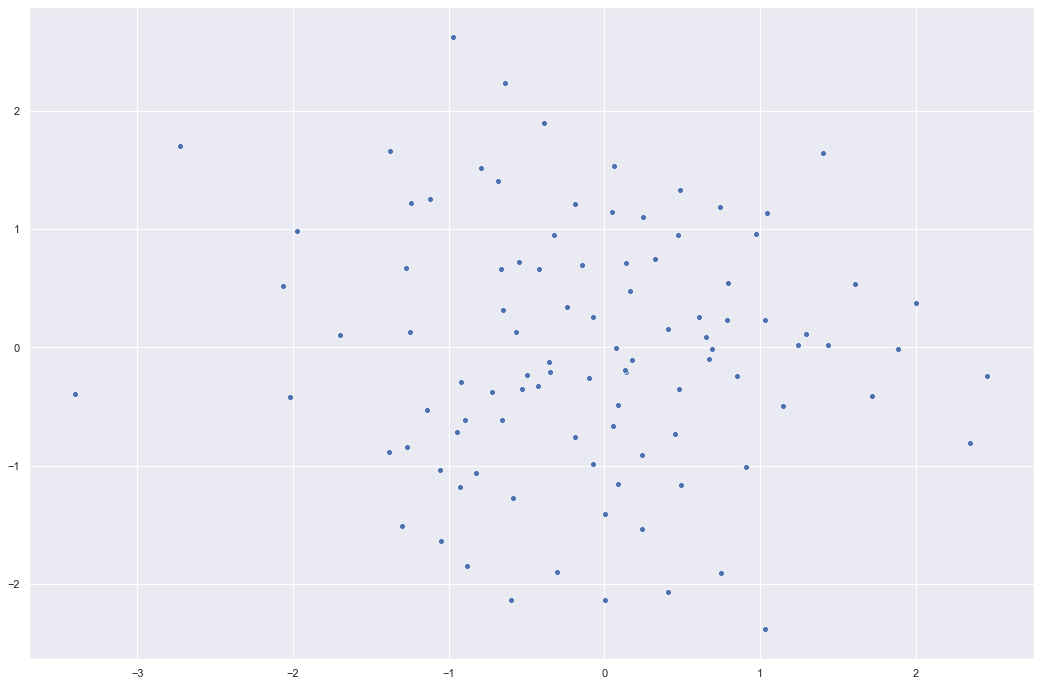

In [48]:
estilo()
A=np.random.randn(100)
B=np.random.randn(100)
sns.scatterplot(A,B)

# Parte 2

In [49]:
df

,product_type,property_type,rent_type,location,barrio,UPlArea,price,price_per_m2,surface,n_rooms,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,areas_verdes_perc,densidad_poblacion
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,1050000.0,16666.666667,63.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,650000.0,18055.555556,36.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,650000.0,18055.555556,36.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,3930000.0,39300.000000,100.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,1900000.0,19587.628866,97.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,900000.0,9000.000000,100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,950000.0,7916.666667,120.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16298,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,550000.0,13750.000000,40.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,630000.0,14000.000000,45.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.shape

(16299, 27)

In [51]:
df.isnull().sum()

product_type                               2953
property_type                                 0
rent_type                                     0
location                                      0
barrio                                        0
UPlArea                                    1946
price                                         0
price_per_m2                                  0
surface                                       0
n_rooms                                      33
n_bath                                      229
n_garajes                                     0
details                                     110
url                                           0
metrocuadrado_index                           0
furnished                                     0
upz                                        1946
personas                                   1946
trabajoinf_ninos_5_17_anos_perc            1946
trabajoinfampliado_ninos_5_17_anos_perc    1946
jovenes_14_24_anos_nini_perc            

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16299 entries, 0 to 16300
Data columns (total 27 columns):
product_type                               13346 non-null object
property_type                              16299 non-null object
rent_type                                  16299 non-null object
location                                   16299 non-null object
barrio                                     16299 non-null object
UPlArea                                    14353 non-null float64
price                                      16299 non-null float64
price_per_m2                               16299 non-null float64
surface                                    16299 non-null float64
n_rooms                                    16266 non-null object
n_bath                                     16070 non-null object
n_garajes                                  16299 non-null object
details                                    16189 non-null object
url                                       

In [53]:
# Notamos que todas las variables tipo 'Object' en realidad pueden ser 
# representadas como str.
objects = [col for col in df.columns if df[col].dtype == 'O']
objects

['product_type',
 'property_type',
 'rent_type',
 'location',
 'barrio',
 'n_rooms',
 'n_bath',
 'n_garajes',
 'details',
 'url',
 'upz']

In [54]:
# Hacemos typecasting para garantizar el formato de las variables.
df = df.astype({col:'str' for col in objects})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16299 entries, 0 to 16300
Data columns (total 27 columns):
product_type                               16299 non-null object
property_type                              16299 non-null object
rent_type                                  16299 non-null object
location                                   16299 non-null object
barrio                                     16299 non-null object
UPlArea                                    14353 non-null float64
price                                      16299 non-null float64
price_per_m2                               16299 non-null float64
surface                                    16299 non-null float64
n_rooms                                    16299 non-null object
n_bath                                     16299 non-null object
n_garajes                                  16299 non-null object
details                                    16299 non-null object
url                                       

In [55]:
df.head()

,product_type,property_type,rent_type,location,barrio,UPlArea,price,price_per_m2,surface,n_rooms,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,areas_verdes_perc,densidad_poblacion
0,nan,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,1050000.0,16666.666667,63.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nan,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,650000.0,18055.555556,36.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nan,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,650000.0,18055.555556,36.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,3930000.0,39300.000000,100.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,1900000.0,19587.628866,97.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
names = ['numeric','categorical','miscelaneous']

numeric = ['UPlArea','price','surface','metrocuadrado_index',
           'personas', 'trabajoinf_ninos_5_17_anos_perc',
           'trabajoinfampliado_ninos_5_17_anos_perc',
           'jovenes_14_24_anos_nini_perc','indice_envegecimiento',
           'jefe_mujer_perc','adultos_mayores_pobres_perc','indice_inseguridad',
           'areas_verdes_perc','densidad_poblacion','price_per_m2']

'''Recordemos que el barrio puede identificarse con un código upz'''
miscelaneous= ['location','barrio','url','details']

# Se crea una lista con las columnas categoricas
categorical = list((set(df.columns) - set(numeric)) - set(miscelaneous))
categorical

['product_type',
 'upz',
 'furnished',
 'property_type',
 'n_bath',
 'n_garajes',
 'rent_type',
 'n_rooms']

In [57]:
mapping = [('numeric', col) for col in numeric]
mapping.extend([('categorical', col) for col in categorical])
mapping.extend([('miscelaneous', col) for col in miscelaneous])

In [58]:
df = df.reindex(columns=numeric + categorical + miscelaneous)
df.columns = pd.MultiIndex.from_tuples(mapping)

In [59]:
df.head()

numeric                                                  \
  UPlArea      price surface metrocuadrado_index personas   
0     NaN  1050000.0    63.0                25.6      NaN   
1     NaN   650000.0    36.0                32.5      NaN   
2     NaN   650000.0    36.0                31.8      NaN   
3     NaN  3930000.0   100.0                57.3      NaN   
4     NaN  1900000.0    97.0                38.7      NaN   

                                                                           \
  trabajoinf_ninos_5_17_anos_perc trabajoinfampliado_ninos_5_17_anos_perc   
0                             NaN                                     NaN   
1                             NaN                                     NaN   
2                             NaN                                     NaN   
3                             NaN                                     NaN   
4                             NaN                                     NaN   

                                                                      ...  \
  jovenes_14_24_anos_nini_perc indice_envegecimiento jefe_mujer_perc  ...   
0                          NaN                   NaN             NaN  ...   
1                          NaN                   NaN             NaN  ...   
2                          NaN                   NaN             NaN  ...   
3                          NaN                   NaN             NaN  ...   
4                          NaN                   NaN             NaN  ...   

  categorical                                                   \
    furnished property_type n_bath n_garajes rent_type n_rooms   
0         0.0          casa      2         1  arriendo       3   
1         0.0   apartamento      1         3  arriendo       1   
2         0.0   apartamento      1         3  arriendo       1   
3         1.0          casa      2         1  arriendo       3   
4         0.0          casa      3         1  arriendo       2   

                                miscelaneous                               \
                                    location                       barrio   
0              LA SOLEDAD NORTE Bogotá D.C..             la soledad norte   
1              LA SOLEDAD NORTE Bogotá D.C..             la soledad norte   
2              LA SOLEDAD NORTE Bogotá D.C..             la soledad norte   
3   CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..  ciudad salitre sur-oriental   
4   CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..  ciudad salitre sur-oriental   

                                                      \
                                                 url   
0  https://www.metrocuadrado.com/inmueble/arriend...   
1  https://www.metrocuadrado.com/inmueble/arriend...   
2  https://www.metrocuadrado.com/inmueble/arriend...   
3  https://www.metrocuadrado.com/inmueble/arriend...   
4  https://www.metrocuadrado.com/inmueble/arriend...   

                                                      
                                             details  
0  Excelente casa cerca de la calle 80 y Avenida ...  
1  Apartaestudio,un baño, cuarto piso, no tiene p...  
2  5858-Apartaestudio,un baño, cuarto piso, no ti...  
3  Se arrienda casa bonita totalmente amoblada co...  
4  SAUNA, ALCOBA dos, ALCOBA SERVICIO, SALACOMEDO...  

[5 rows x 27 columns]

In [60]:
#NUMERICAS
print(len(numeric))
numeric

15


['UPlArea',
 'price',
 'surface',
 'metrocuadrado_index',
 'personas',
 'trabajoinf_ninos_5_17_anos_perc',
 'trabajoinfampliado_ninos_5_17_anos_perc',
 'jovenes_14_24_anos_nini_perc',
 'indice_envegecimiento',
 'jefe_mujer_perc',
 'adultos_mayores_pobres_perc',
 'indice_inseguridad',
 'areas_verdes_perc',
 'densidad_poblacion',
 'price_per_m2']

In [61]:
'''Previo a graficar las variables numéricas, debemos notar que existen
registros en los cuales 'surface' es 0( y por ende 'price_per_m2' es inf)
'''
zero_surf=df[df[('numeric','surface')] == 0][[('numeric','price'),('numeric','surface'),
                                   ('numeric','price_per_m2')]]
nonzero_surf=df[df[('numeric','surface')] > 0][[('numeric','price'),('numeric','surface'),
                                   ('numeric','price_per_m2')]]
print("Total de registros: ",len(df))
print("Registros con 'surface'=0 : ",len(zero_surf))
print("Registros con 'surface'>0 : ",len(nonzero_surf))
zero_surf

Total de registros:  16299
Registros con 'surface'=0 :  16
Registros con 'surface'>0 :  16283


numeric                     
           price surface price_per_m2
1247    685121.0     0.0          inf
2262   1317950.0     0.0          inf
2265   2743261.0     0.0          inf
4493    442023.0     0.0          inf
4880    583945.0     0.0          inf
4882    462441.0     0.0          inf
5036    464884.0     0.0          inf
7189    982506.0     0.0          inf
7855   1062754.0     0.0          inf
8519   1564000.0     0.0          inf
10030  1630000.0     0.0          inf
12274   722876.0     0.0          inf
13610  1400000.0     0.0          inf
13937  1614000.0     0.0          inf
15196   284010.0     0.0          inf
16043   333123.0     0.0          inf

In [62]:
'''Luego podemos considerar estos datos como faltantes, pues no existen
propiedades de 0 m2 con tales precios.
'''
df.loc[:,[('numeric','surface')]] = df[[('numeric','surface')]].replace(float(0),np.nan)
df.loc[:,[('numeric','price_per_m2')]] = df[[('numeric','price_per_m2')]].replace(np.inf,np.nan)

In [63]:
# Verificamos que el cambio se realizó correctamente
df[df[('numeric','surface')].isnull()][[('numeric','price'),('numeric','surface'),
                                   ('numeric','price_per_m2')]]

numeric                     
           price surface price_per_m2
1247    685121.0     NaN          NaN
2262   1317950.0     NaN          NaN
2265   2743261.0     NaN          NaN
4493    442023.0     NaN          NaN
4880    583945.0     NaN          NaN
4882    462441.0     NaN          NaN
5036    464884.0     NaN          NaN
7189    982506.0     NaN          NaN
7855   1062754.0     NaN          NaN
8519   1564000.0     NaN          NaN
10030  1630000.0     NaN          NaN
12274   722876.0     NaN          NaN
13610  1400000.0     NaN          NaN
13937  1614000.0     NaN          NaN
15196   284010.0     NaN          NaN
16043   333123.0     NaN          NaN

In [64]:
df[df[('numeric','price')]> 10**8 ]

numeric                                                      \
            UPlArea         price surface metrocuadrado_index  personas   
355    3.286562e+06  1.700000e+09   48.00                58.2   69961.0   
739    5.374763e+06  6.800000e+09  200.00                58.2  112706.0   
1033   4.586983e+06  2.800000e+08   70.34                62.4  115124.0   
2241   2.060243e+06  2.450000e+08   34.00                62.8   22440.0   
2294   2.060243e+06  4.200000e+08   61.00                56.1   22440.0   
2381   2.060243e+06  5.300000e+08   88.00                38.8   22440.0   
2488   2.060243e+06  2.280000e+09   80.00                48.6   22440.0   
2870   4.224476e+06  2.020000e+09   57.00                61.8   52951.0   
3926            NaN  3.100000e+08   50.00                57.7       NaN   
4111            NaN  1.700000e+09   71.00                61.4       NaN   
4121            NaN  1.450000e+08   77.00                62.5       NaN   
4515   4.926920e+06  4.500000e+09  350.00                41.6  115124.0   
4660   4.926920e+06  2.700000e+08   37.00                60.8  115124.0   
4747            NaN  4.800000e+08  160.00                39.0       NaN   
4754            NaN  4.700000e+08  160.00                59.4       NaN   
5104   4.140271e+06  1.250000e+09  300.00                62.5   90912.0   
5268            NaN  4.200000e+09  270.00                65.9       NaN   
5307   2.004627e+06  6.000000e+08  270.00                46.9   43337.0   
6588            NaN  3.024000e+09  106.00                44.0       NaN   
6736   2.847741e+06  3.100000e+08   72.00                42.4   91513.0   
6996   6.722632e+06  4.680000e+08   93.00                37.1  102981.0   
6998   6.722632e+06  3.700000e+08   82.00                63.4  102981.0   
7235   2.625357e+06  9.000000e+08  193.00                54.9   88155.0   
7316   4.745042e+06  3.200000e+08   58.62                51.2   90440.0   
7533   2.851990e+06  3.500000e+08   80.00                56.3   53837.0   
7884   1.786034e+06  9.500000e+08  210.00                66.4   95541.0   
8209   2.748166e+06  5.000000e+09  340.00                69.1   54214.0   
8624   5.598956e+06  2.150000e+09   96.00                58.1  188751.0   
9183   4.586983e+06  5.700000e+08   98.50                44.1  115124.0   
10199  4.224476e+06  3.600000e+08   53.00                64.8   52951.0   
10214  4.224476e+06  1.700000e+08   42.00                64.4   52951.0   
10266  4.224476e+06  3.200000e+09   65.00                61.9   52951.0   
10441  4.224476e+06  4.500000e+08   73.00                46.7   52951.0   
11178  4.224476e+06  5.200000e+08   84.00                62.9   52951.0   
11609  3.359785e+06  7.800000e+08   92.00                56.5   52951.0   
11611  3.359785e+06  7.800000e+08   92.00                67.9   52951.0   
11661  3.359785e+06  5.700000e+08   98.00                63.3   52951.0   
11874  4.586983e+06  4.301784e+08   51.00                71.1  115124.0   
11904  4.586983e+06  3.200000e+08   52.00                61.3  115124.0   
12003  4.586983e+06  4.500000e+08   72.00                46.7  115124.0   
12519  2.349163e+06  1.800000e+08  164.00                67.5   45890.0   
13176  1.593025e+06  2.400000e+08   35.00                47.4   53837.0   
13399  2.357008e+06  9.500000e+08  315.00                53.8   19451.0   
13552  2.851990e+06  8.100000e+08  125.00                62.0   53837.0   
13630  4.926920e+06  7.800000e+09  336.00                62.7  115124.0   
13667  4.926920e+06  2.800000e+09   82.00                74.3  115124.0   
14230  4.224476e+06  4.500000e+08   62.00                54.7   52951.0   
14415  4.224476e+06  8.900000e+08  136.00                71.7   52951.0   
14567  4.224476e+06  2.800000e+09   51.00                52.2   52951.0   
14568  4.224476e+06  2.800000e+09   51.00                44.6   52951.0   
14569  4.224476e+06  2.800000e+09   51.00                60.8   52951.0   
14599  4.224476e+06  2.800000e+09   5

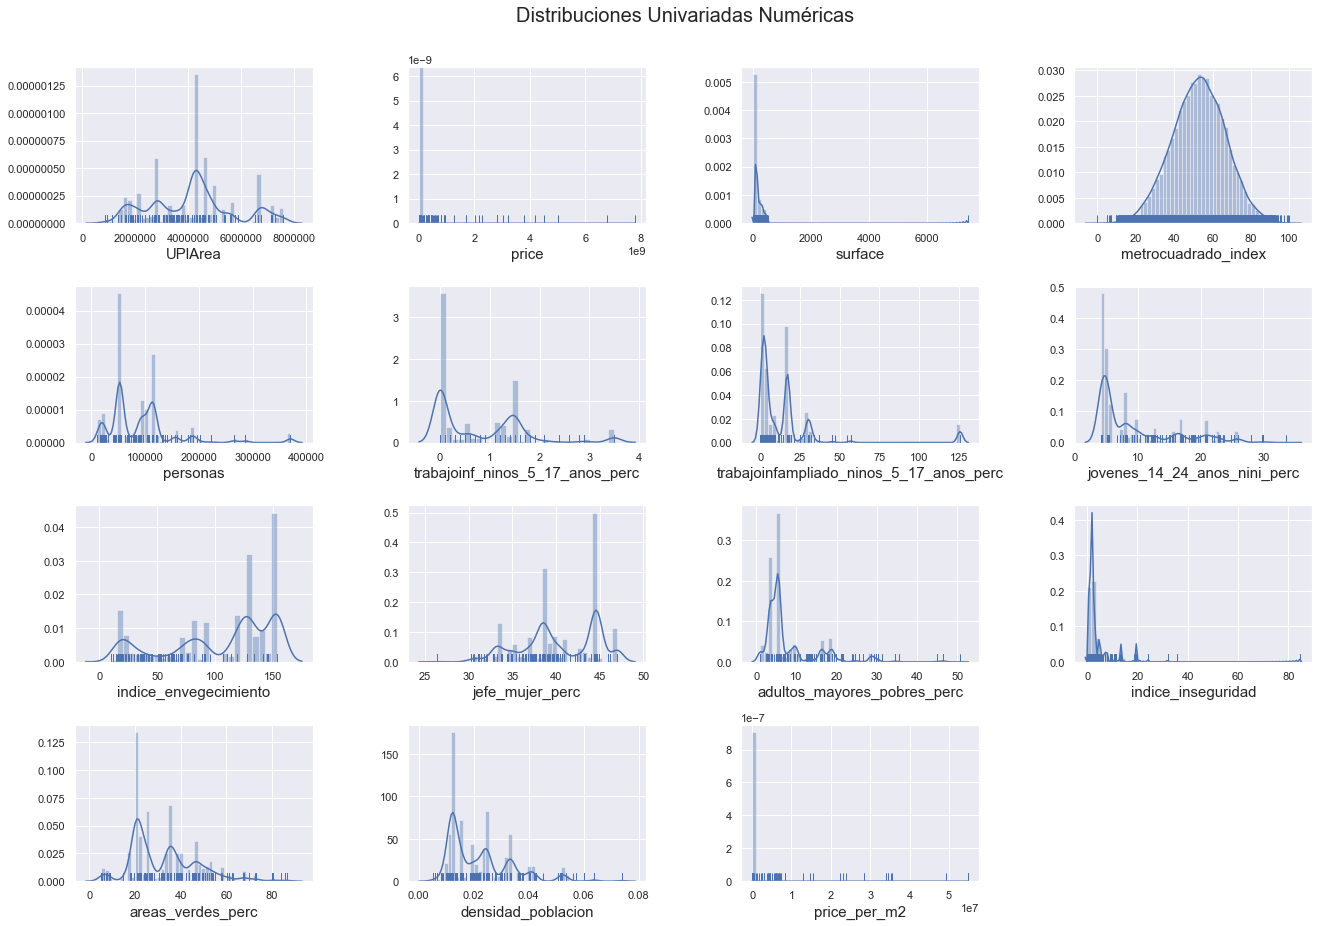

In [65]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4)#, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

In [66]:
'''Notamos en 'price' y 'price per_m2' que hay una diferencia muy brusca en la
densidad de los datos, donde la tendencia es clara a precios mas moderados en
comparacion.
Dado que 'price_per_m2' es nuestra variable respuesta, nos interesa que esta
presente una distribución que sea lo suficientemente suave para 
poder realizar futuras transformaciones en nuestro futuro modelo regresor.
Notamos que considerando datos con valor de 'price_per_m2' < 100.000, se 
obtiene el siguiente dataframe.
'''
df[df[('numeric','price_per_m2')]<=10**5]

numeric                                                  \
            UPlArea      price surface metrocuadrado_index personas   
0               NaN  1050000.0    63.0                25.6      NaN   
1               NaN   650000.0    36.0                32.5      NaN   
2               NaN   650000.0    36.0                31.8      NaN   
3               NaN  3930000.0   100.0                57.3      NaN   
4               NaN  1900000.0    97.0                38.7      NaN   
...             ...        ...     ...                 ...      ...   
16296           NaN   900000.0   100.0                34.9      NaN   
16297           NaN   950000.0   120.0                38.3      NaN   
16298           NaN   550000.0    40.0                31.4      NaN   
16299           NaN   630000.0    45.0                48.5      NaN   
16300  2.752775e+06   700000.0    30.0                31.5  68430.0   

                                                                               \
      trabajoinf_ninos_5_17_anos_perc trabajoinfampliado_ninos_5_17_anos_perc   
0                                 NaN                                     NaN   
1                                 NaN                                     NaN   
2                                 NaN                                     NaN   
3                                 NaN                                     NaN   
4                                 NaN                                     NaN   
...                               ...                                     ...   
16296                             NaN                                     NaN   
16297                             NaN                                     NaN   
16298                             NaN                                     NaN   
16299                             NaN                                     NaN   
16300                             0.6                                     3.9   

                                                                          ...  \
      jovenes_14_24_anos_nini_perc indice_envegecimiento jefe_mujer_perc  ...   
0                              NaN                   NaN             NaN  ...   
1                              NaN                   NaN             NaN  ...   
2                              NaN                   NaN             NaN  ...   
3                              NaN                   NaN             NaN  ...   
4                              NaN                   NaN             NaN  ...   
...                            ...                   ...             ...  ...   
16296                          NaN                   NaN             NaN  ...   
16297                          NaN                   NaN             NaN  ...   
16298                          NaN                   NaN             NaN  ...   
16299                          NaN                   NaN             NaN  ...   
16300                         20.7                  35.2       44.579934  ...   

      categorical                                                   \
        furnished property_type n_bath n_garajes rent_type n_rooms   
0             0.0          casa      2         1  arriendo       3   
1             0.0   apartamento      1         3  arriendo       1   
2             0.0   apartamento      1         3  arriendo       1   
3             1.0          casa      2         1  arriendo       3   
4             0.0          casa      3         1  arriendo       2   
...           ...           ...    ...       ...       ...     ...   
16296         0.0          casa    nan         2  arriendo       1   
16297         0.0          casa    nan         1  arriendo       1   
16298         0.0   apartamento      1         2  arriendo       1   
16299         0.0   apartamento      1         3  arriendo       1   
16300         0.0   apartamento      1         2  arriendo       1   

                                     miscelaneous  \
                

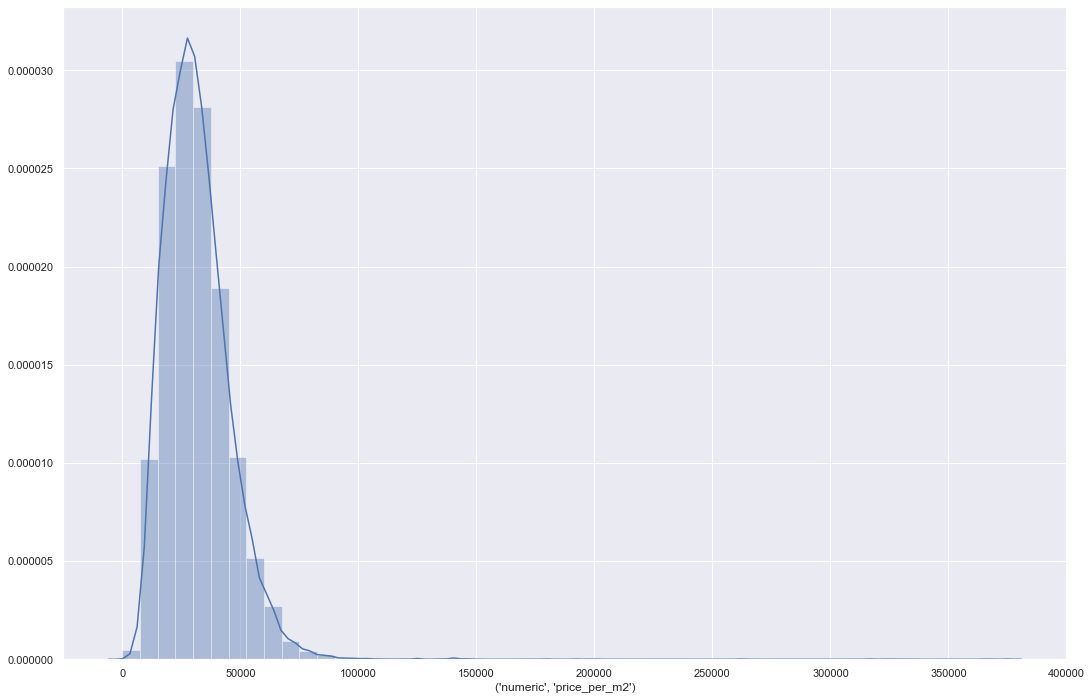

In [67]:
'''Tenemos una diferencia de 100 datos con la data original, es decir,
estamos ignorando los 100 valores donde 'price_per_m2' > 100.000. Veamos 
ahora como se ve su distribución.
'''
sns.distplot(df[df[('numeric','price_per_m2')] <= 10**6][('numeric','price_per_m2')])

In [68]:
'''Notamos una clara mejora con respecto al escenario con toda la data.
Actualizamos df y vemos ahora como distribuyen todas las variables numericas
asociadas.
'''
df = df[df[('numeric','price_per_m2')] <= 10**5]
df

numeric                                                  \
            UPlArea      price surface metrocuadrado_index personas   
0               NaN  1050000.0    63.0                25.6      NaN   
1               NaN   650000.0    36.0                32.5      NaN   
2               NaN   650000.0    36.0                31.8      NaN   
3               NaN  3930000.0   100.0                57.3      NaN   
4               NaN  1900000.0    97.0                38.7      NaN   
...             ...        ...     ...                 ...      ...   
16296           NaN   900000.0   100.0                34.9      NaN   
16297           NaN   950000.0   120.0                38.3      NaN   
16298           NaN   550000.0    40.0                31.4      NaN   
16299           NaN   630000.0    45.0                48.5      NaN   
16300  2.752775e+06   700000.0    30.0                31.5  68430.0   

                                                                               \
      trabajoinf_ninos_5_17_anos_perc trabajoinfampliado_ninos_5_17_anos_perc   
0                                 NaN                                     NaN   
1                                 NaN                                     NaN   
2                                 NaN                                     NaN   
3                                 NaN                                     NaN   
4                                 NaN                                     NaN   
...                               ...                                     ...   
16296                             NaN                                     NaN   
16297                             NaN                                     NaN   
16298                             NaN                                     NaN   
16299                             NaN                                     NaN   
16300                             0.6                                     3.9   

                                                                          ...  \
      jovenes_14_24_anos_nini_perc indice_envegecimiento jefe_mujer_perc  ...   
0                              NaN                   NaN             NaN  ...   
1                              NaN                   NaN             NaN  ...   
2                              NaN                   NaN             NaN  ...   
3                              NaN                   NaN             NaN  ...   
4                              NaN                   NaN             NaN  ...   
...                            ...                   ...             ...  ...   
16296                          NaN                   NaN             NaN  ...   
16297                          NaN                   NaN             NaN  ...   
16298                          NaN                   NaN             NaN  ...   
16299                          NaN                   NaN             NaN  ...   
16300                         20.7                  35.2       44.579934  ...   

      categorical                                                   \
        furnished property_type n_bath n_garajes rent_type n_rooms   
0             0.0          casa      2         1  arriendo       3   
1             0.0   apartamento      1         3  arriendo       1   
2             0.0   apartamento      1         3  arriendo       1   
3             1.0          casa      2         1  arriendo       3   
4             0.0          casa      3         1  arriendo       2   
...           ...           ...    ...       ...       ...     ...   
16296         0.0          casa    nan         2  arriendo       1   
16297         0.0          casa    nan         1  arriendo       1   
16298         0.0   apartamento      1         2  arriendo       1   
16299         0.0   apartamento      1         3  arriendo       1   
16300         0.0   apartamento      1         2  arriendo       1   

                                     miscelaneous  \
                

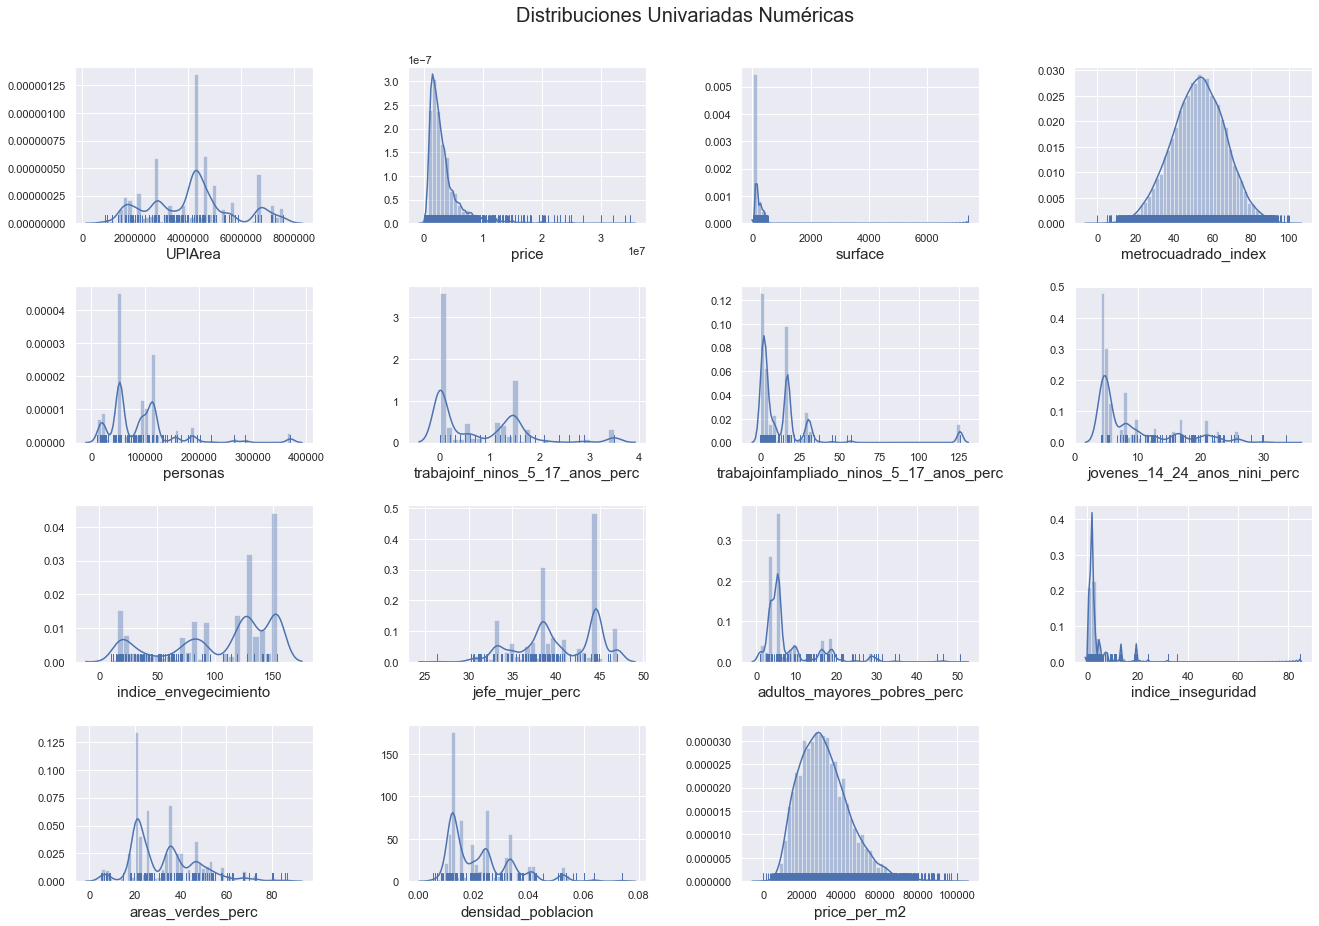

In [69]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4)#, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

In [70]:
'''Notamos como la distribución de la data es más clara al trabajar sin los casos
donde price_per_m2 es demasiado grande. Notamos en surface que existe un dato que se aleja
mucho de donde se concentra la data, y su valor es al menos superior a 1000, donde los 
demas valores se concentran por debajo de 1000. Buscamos tal valor
'''
df[('numeric','surface')].nlargest(2)

9491    7400.0
5318     540.0
Name: (numeric, surface), dtype: float64

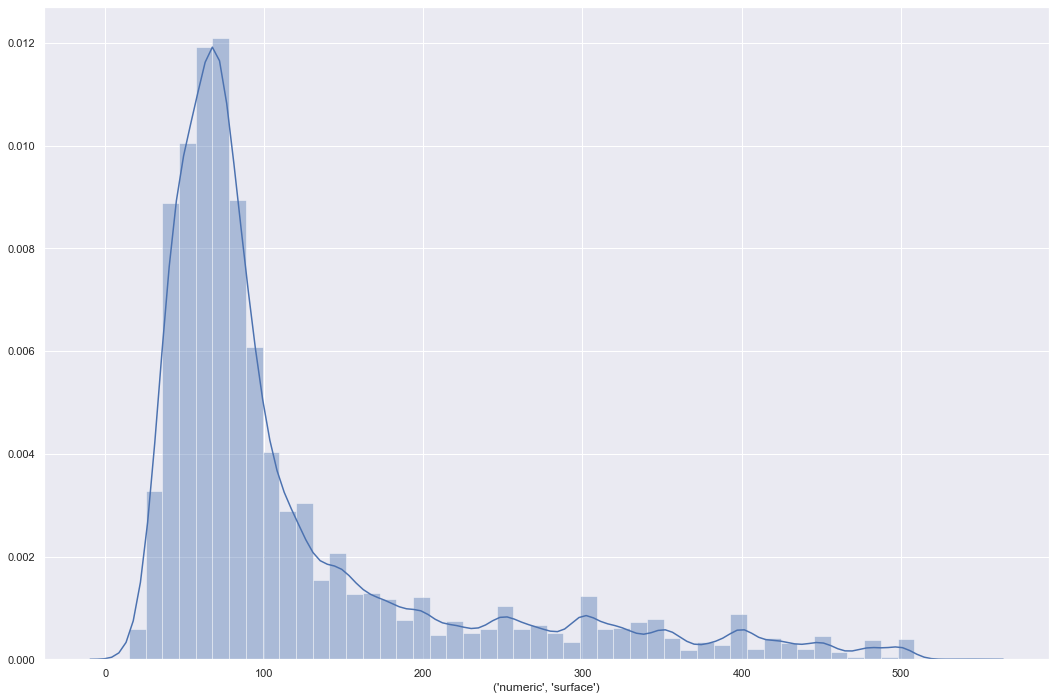

In [71]:
'''Veamos qué ocurre al quitar tal valor del dataframe, notamos una
clara mejora.
'''
sns.distplot(df[df[('numeric','surface')]< 10**3][('numeric','surface')])

In [72]:
df = df[df[('numeric','surface')]< 10**3]

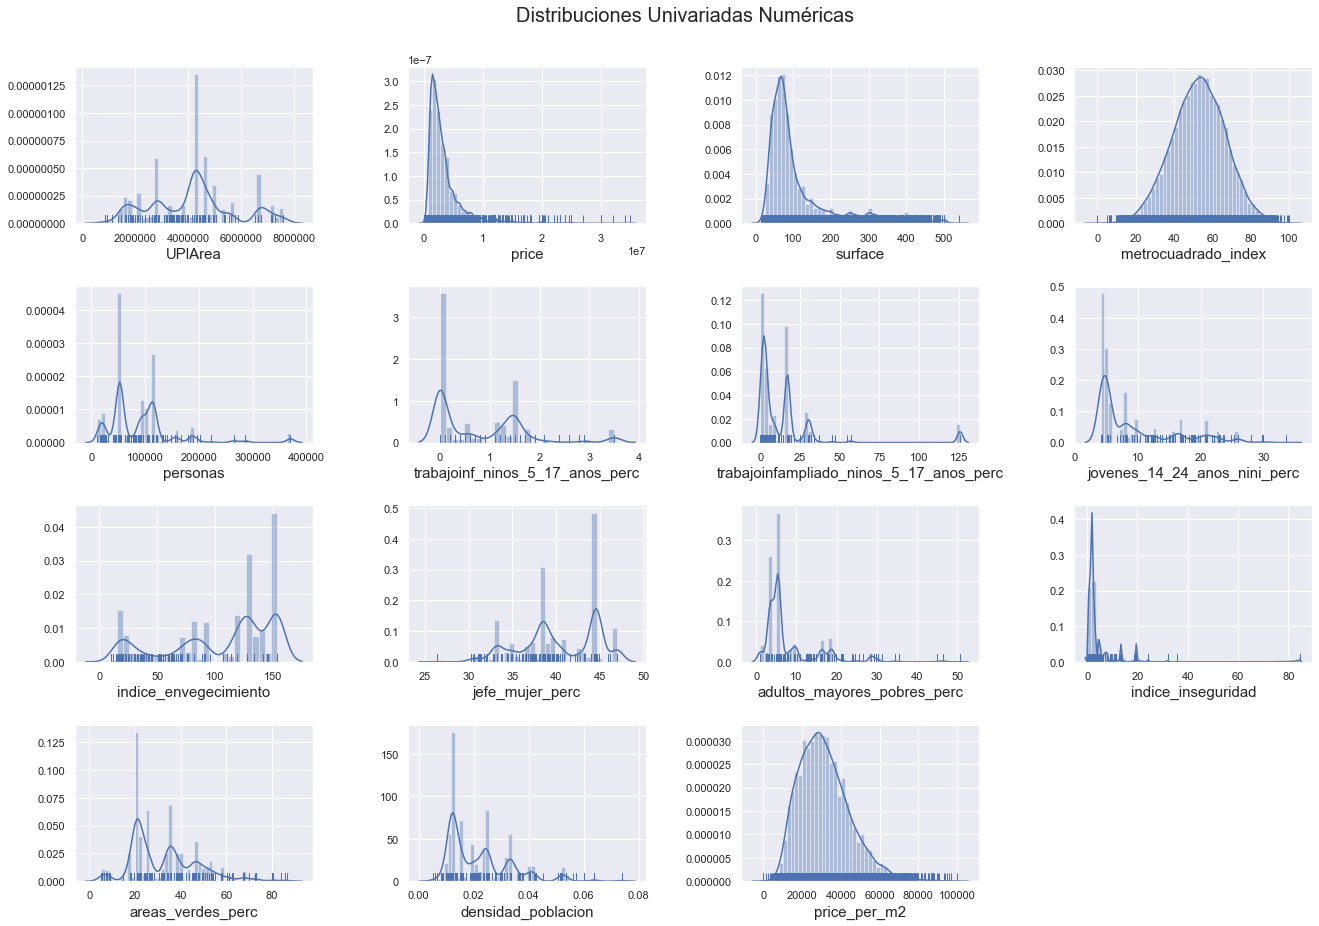

In [73]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4)#, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

In [74]:
#CATEGORICAS
print(len(categorical))
categorical

8


['product_type',
 'upz',
 'furnished',
 'property_type',
 'n_bath',
 'n_garajes',
 'rent_type',
 'n_rooms']

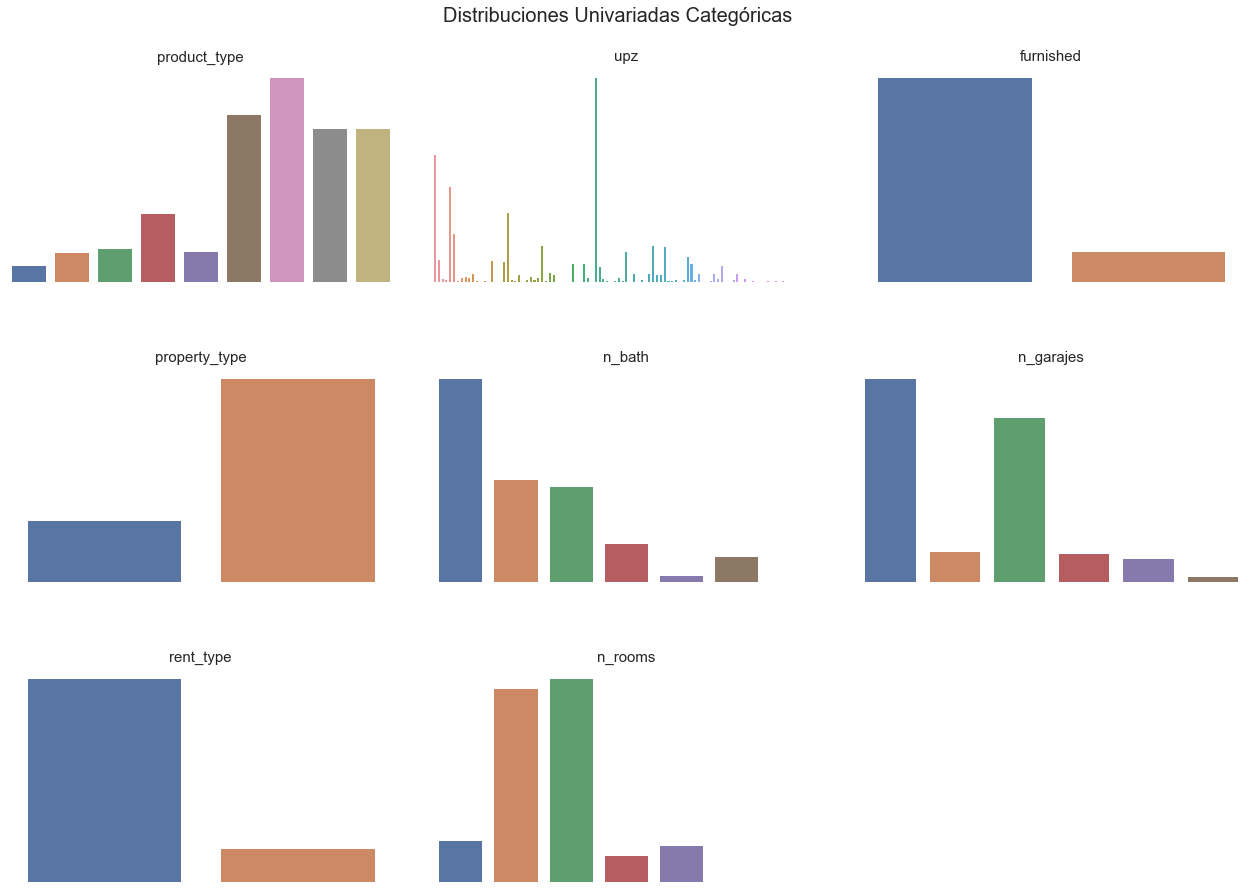

In [75]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=3, ncols=3)#, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()
# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Categóricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), categorical):
    # Graficos para datos tipos str
    sns.countplot(df[('categorical',col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
  
    
# Se ajusta el espaciado interno entre subplots
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

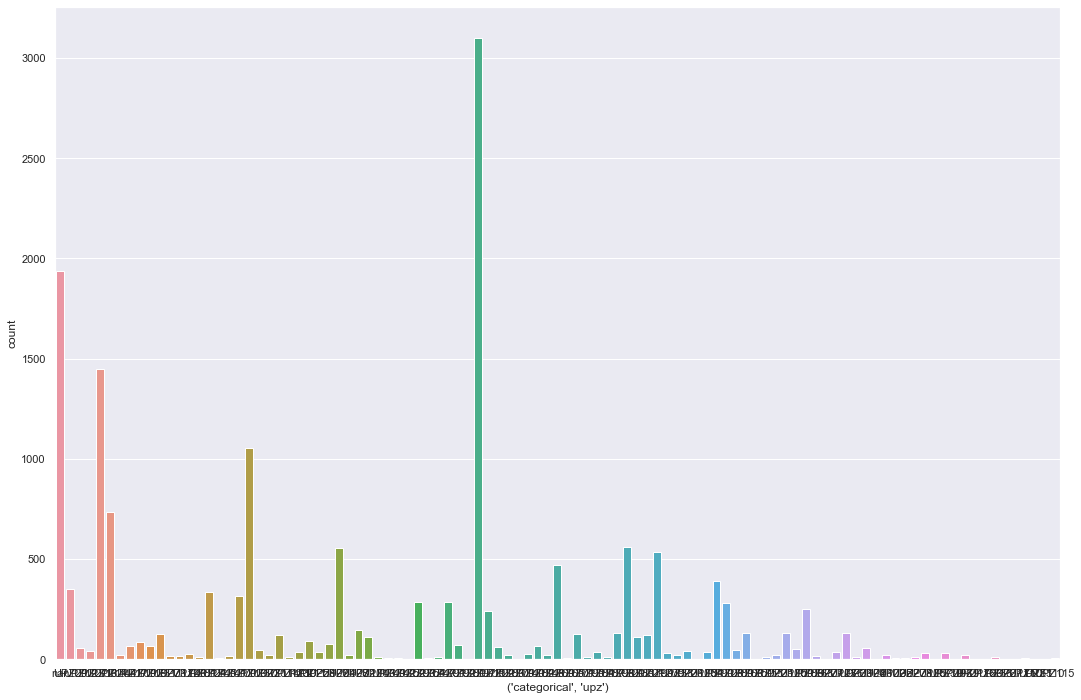

In [76]:
'''Observamos que la variable categoriza upz presenta un histograma a la vista
confuso(demasiadas categorias), por lo que más adelante buscaremos una mejor
manera de agrupás éstas categorías
'''
sns.countplot(df[('categorical','upz')])

In [77]:
#'''Notamos como en barrio no se ve nada a simple vista, pero en realidad
#se debe a que hay demasiados barrios por contar
#'''
#sns.countplot(df[('categorical','barrio')])

In [78]:
#'''Sin embargo, recordemos que el barrio puede identificarse con un
#código upz, el cual presenta una distribución más clara. Por lo tanto,
#se recategorizará la columna barrio como miscelánea y se trabajará con
#upz como identificador, sobre el cual se verá más adelante una mejor
#manera de agrupar éstas categorías.
#'''

In [79]:
'''Estudiemos la variabilidad de las variables ''
'''

"Estudiemos la variabilidad de las variables ''\n"

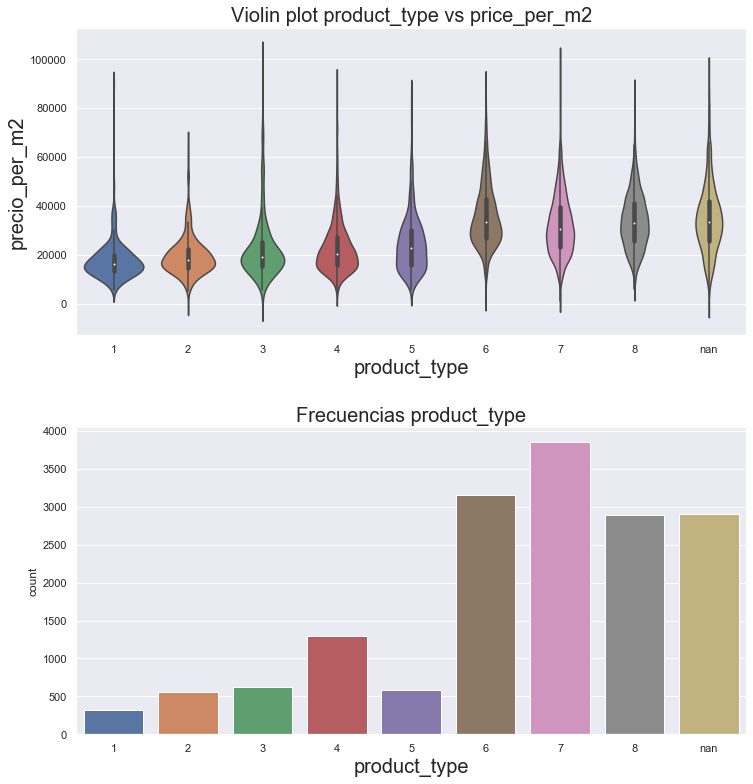

In [80]:
''' 'product_type'
'''
# Sirve para fija el tamaño de las etiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'product_type'),
            y=('numeric', 'price_per_m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','product_type')], ax=ax[1])

ax[0].set_xlabel('product_type', fontdict)
ax[1].set_xlabel('product_type', fontdict)

ax[0].set_ylabel('precio_per_m2', fontdict)
ax[0].set_title('Violin plot product_type vs price_per_m2', fontdict)
ax[1].set_title('Frecuencias product_type', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [81]:
'''Notamos que no difieren mucho en media. Luego podrian presentarse problemas
en cuanto a la identificación de 'price_per_m2' mediante esta variable.
'''

"Notamos que no difieren mucho en media. Luego podrian presentarse problemas\nen cuanto a la identificación de 'price_per_m2' mediante esta variable.\n"

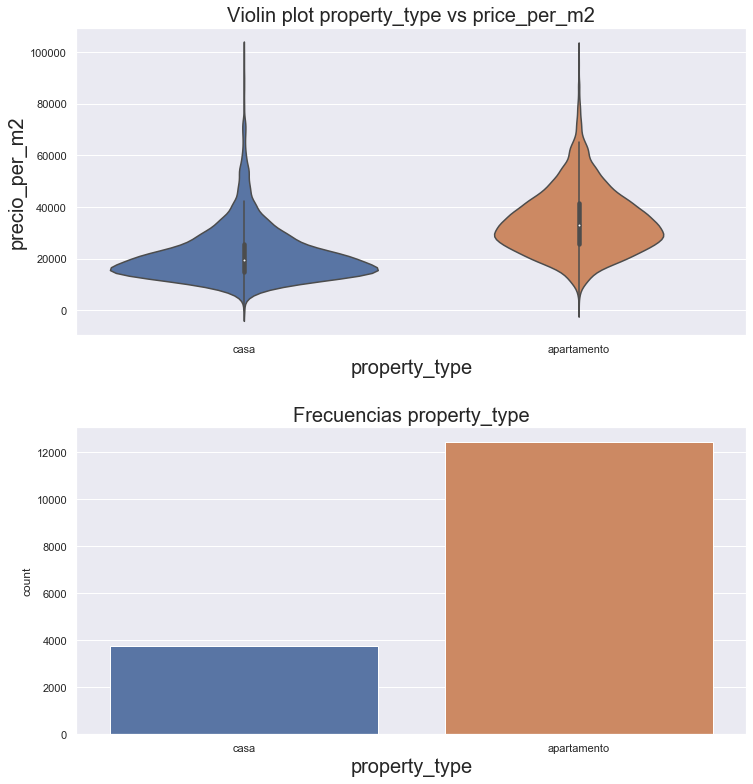

In [82]:
'''property_type
'''
# Sirve para fija el tamaño de las etiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'property_type'),
            y=('numeric', 'price_per_m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','property_type')], ax=ax[1])

ax[0].set_xlabel('property_type', fontdict)
ax[1].set_xlabel('property_type', fontdict)

ax[0].set_ylabel('precio_per_m2', fontdict)
ax[0].set_title('Violin plot property_type vs price_per_m2', fontdict)
ax[1].set_title('Frecuencias property_type', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [83]:
'''Notamos a partir del violinplot que independiente de la categoría, 
cada una abarca una cantidad muy variable de precios cada una, por lo
cual no corresponde una variable muy explicativa de precio_per_m2.
Por lo tanto, representa un candidato a no ser considerado en el modelo final.
'''

'Notamos a partir del violinplot que independiente de la categoría, \ncada una abarca una cantidad muy variable de precios cada una, por lo\ncual no corresponde una variable muy explicativa de precio_per_m2.\nPor lo tanto, representa un candidato a no ser considerado en el modelo final.\n'

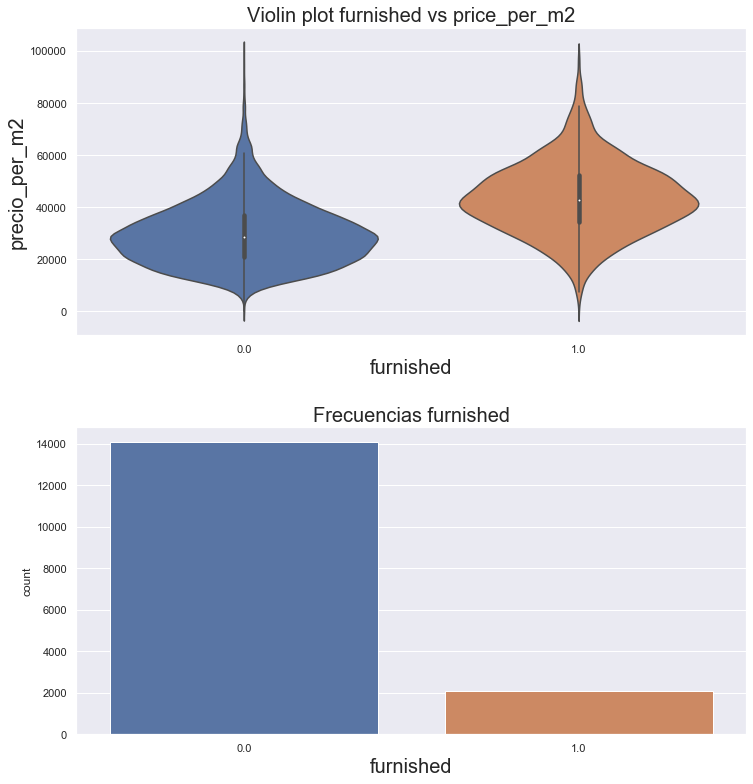

In [84]:
'''furnished
'''
# Sirve para fija el tamaño de las etiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'furnished'),
            y=('numeric', 'price_per_m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','furnished')], ax=ax[1])

ax[0].set_xlabel('furnished', fontdict)
ax[1].set_xlabel('furnished', fontdict)

ax[0].set_ylabel('precio_per_m2', fontdict)
ax[0].set_title('Violin plot furnished vs price_per_m2', fontdict)
ax[1].set_title('Frecuencias furnished', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [85]:
'''Idéntico al caso anterior, luego es candidato a no ser considerado
en el modelo final.
'''

'Idéntico al caso anterior, luego es candidato a no ser considerado\nen el modelo final.\n'

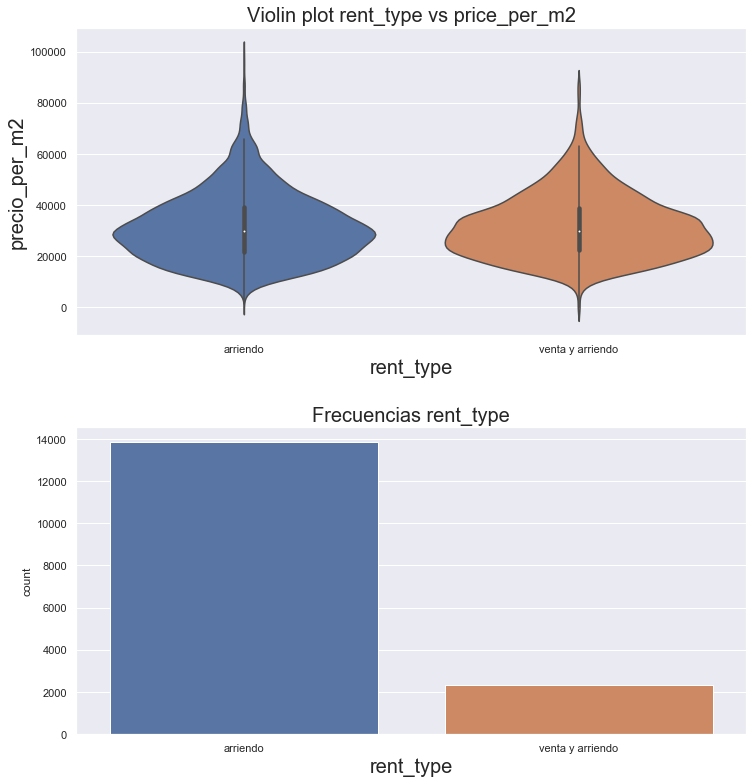

In [86]:
''' 'rent_type'
'''
# Sirve para fija el tamaño de las etiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'rent_type'),
            y=('numeric', 'price_per_m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','rent_type')], ax=ax[1])

ax[0].set_xlabel('rent_type', fontdict)
ax[1].set_xlabel('rent_type', fontdict)

ax[0].set_ylabel('precio_per_m2', fontdict)
ax[0].set_title('Violin plot rent_type vs price_per_m2', fontdict)
ax[1].set_title('Frecuencias rent_type', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [87]:
'''Idéntico al caso anterior, luego es candidato a no ser considerado
en el modelo final.
'''

'Idéntico al caso anterior, luego es candidato a no ser considerado\nen el modelo final.\n'

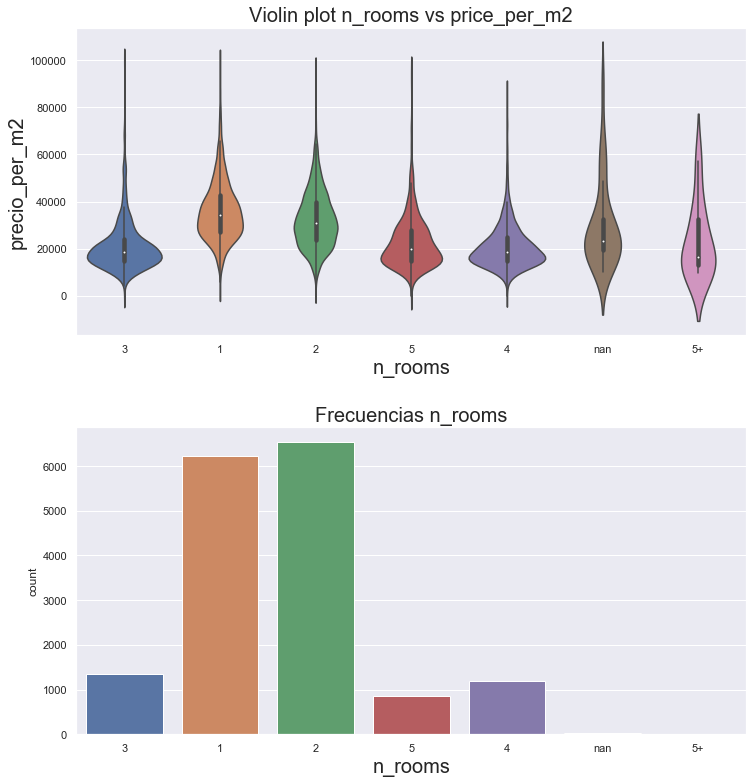

In [88]:
''' 'n_rooms'
'''
# Sirve para fija el tamaño de las etiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'n_rooms'),
            y=('numeric', 'price_per_m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','n_rooms')], ax=ax[1])

ax[0].set_xlabel('n_rooms', fontdict)
ax[1].set_xlabel('n_rooms', fontdict)

ax[0].set_ylabel('precio_per_m2', fontdict)
ax[0].set_title('Violin plot n_rooms vs price_per_m2', fontdict)
ax[1].set_title('Frecuencias n_rooms', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

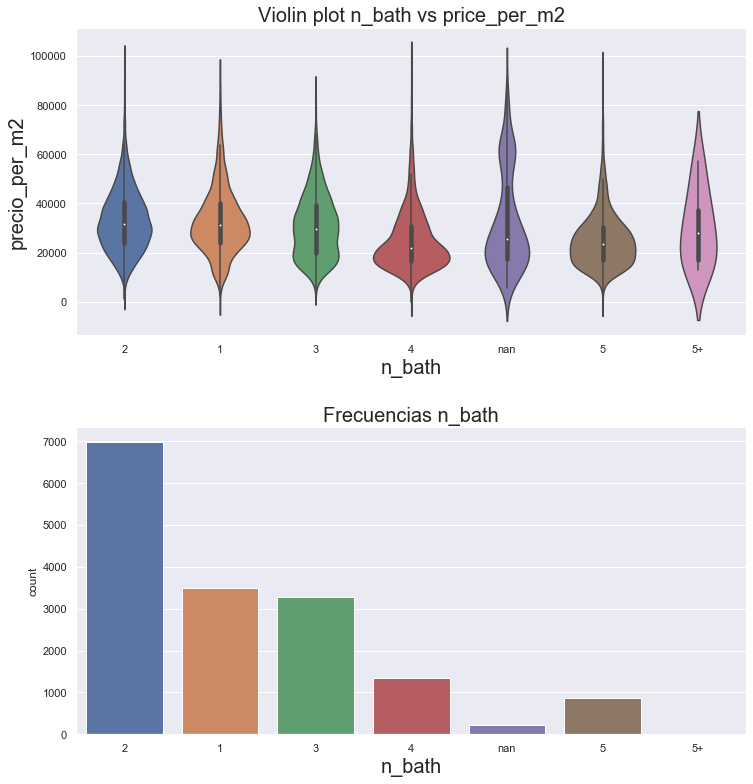

In [89]:
''' 'n_bath'
'''
# Sirve para fija el tamaño de las etiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'n_bath'),
            y=('numeric', 'price_per_m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','n_bath')], ax=ax[1])

ax[0].set_xlabel('n_bath', fontdict)
ax[1].set_xlabel('n_bath', fontdict)

ax[0].set_ylabel('precio_per_m2', fontdict)
ax[0].set_title('Violin plot n_bath vs price_per_m2', fontdict)
ax[1].set_title('Frecuencias n_bath', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

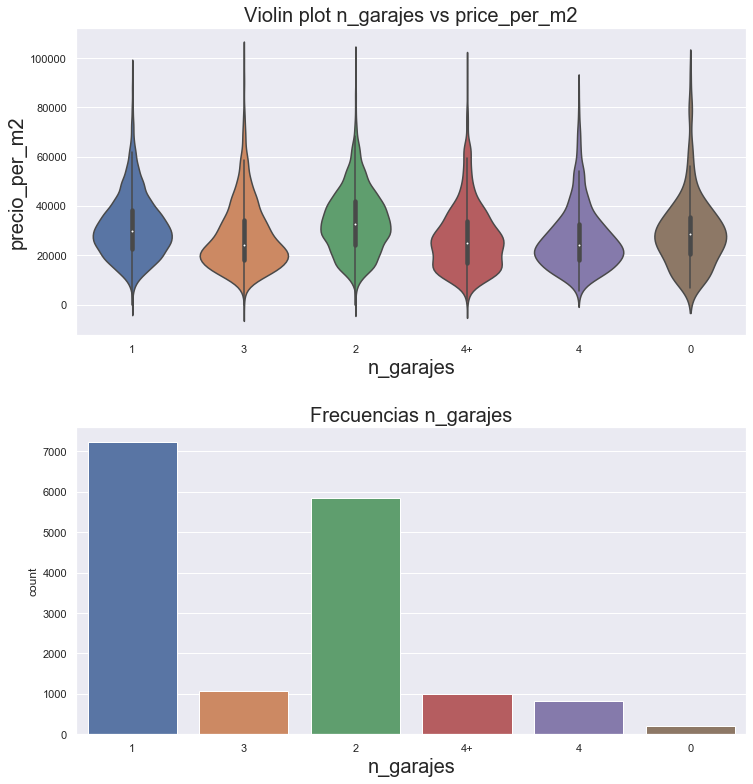

In [90]:
''' 'n_garajes'
'''
# Sirve para fija el tamaño de las etiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'n_garajes'),
            y=('numeric', 'price_per_m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','n_garajes')], ax=ax[1])

ax[0].set_xlabel('n_garajes', fontdict)
ax[1].set_xlabel('n_garajes', fontdict)

ax[0].set_ylabel('precio_per_m2', fontdict)
ax[0].set_title('Violin plot n_garajes vs price_per_m2', fontdict)
ax[1].set_title('Frecuencias n_garajes', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

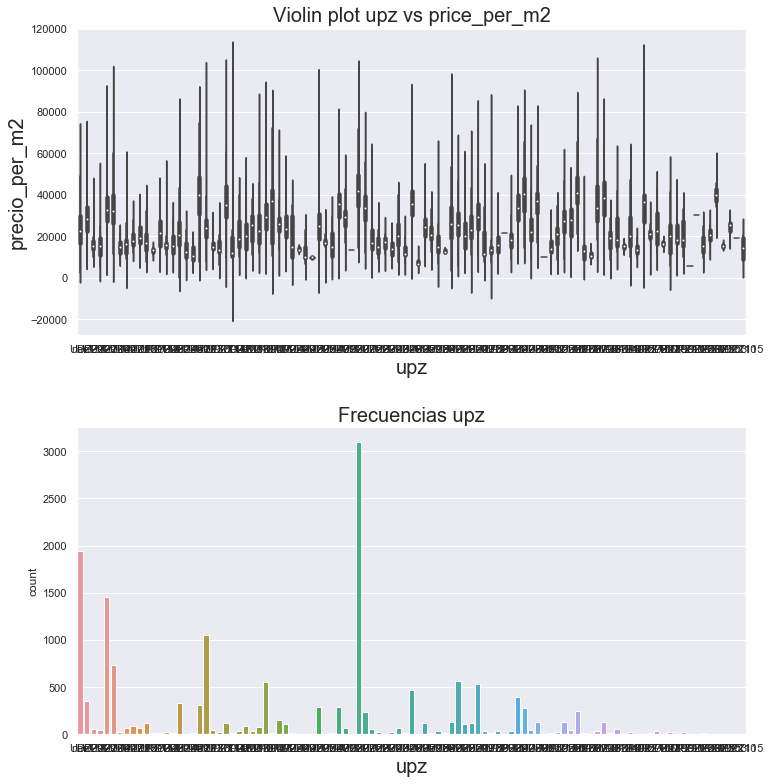

In [91]:
''' 'upz'
'''
# Sirve para fija el tamaño de las etiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'upz'),
            y=('numeric', 'price_per_m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','upz')], ax=ax[1])

ax[0].set_xlabel('upz', fontdict)
ax[1].set_xlabel('upz', fontdict)

ax[0].set_ylabel('precio_per_m2', fontdict)
ax[0].set_title('Violin plot upz vs price_per_m2', fontdict)
ax[1].set_title('Frecuencias upz', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [92]:
'''Queremos ver como se comporta la variable 'price_per_m2' en respuesta
a algunas variables numéricas.
'''
def scatter_dists(col, df=df, h=.3, w=.1, fontdict={'fontsize': 20}, reg=True):
    ''' Recibe una columna numerica y genera una visualizacion comparativa.
    
    Genera una figura por sobre el dataframe (por defecto), recibe 
    parametros extra como el espaciado entre subfigura.
    
    Args:
    ----------
    
    col: String
         El nombre de la columna numerica a visualizar
    
    h,w: float
        Espaciado entre subplot h -> vertical, w -> horizontal
    
    fontdict: dict
             Permite configurar las fuentes de los subplots
    reg: bool
         Permite graficar una regresion lineal sobre los datos (if True)
        
    Returns: None
        Se muestra una figura en pantalla    
    
    '''

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2, 1, figsize=[12, 13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    if reg:
        sns.regplot(x=df[('numeric', col)],
                    y=df[('numeric', 'price_per_m2')],
                    ax=ax[0])
        ax[0].set_title('Regplot plot {} vs price_per_m2'.format(col), fontdict)
    else:
        sns.scatterplot(('numeric', col),
                        y=('numeric', 'price_per_m2'),
                        data=df,
                        ax=ax[0])
        ax[0].set_title('Scatter plot {} vs price_per_m2'.format(col), fontdict)

    
    # Distribucion univariada
    sns.distplot(df[('numeric', col)].dropna(), ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel('price_per_m2', fontdict)
    ax[1].set_title('Frecuencias {}'.format(col), fontdict)

    plt.subplots_adjust(wspace=w, hspace=h)


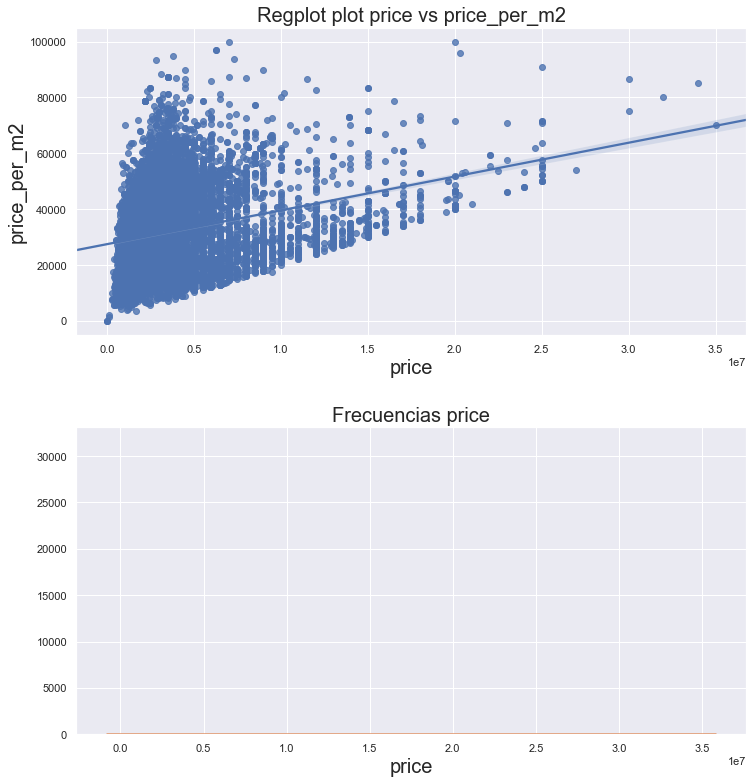

In [93]:
'''
'''
scatter_dists('price')

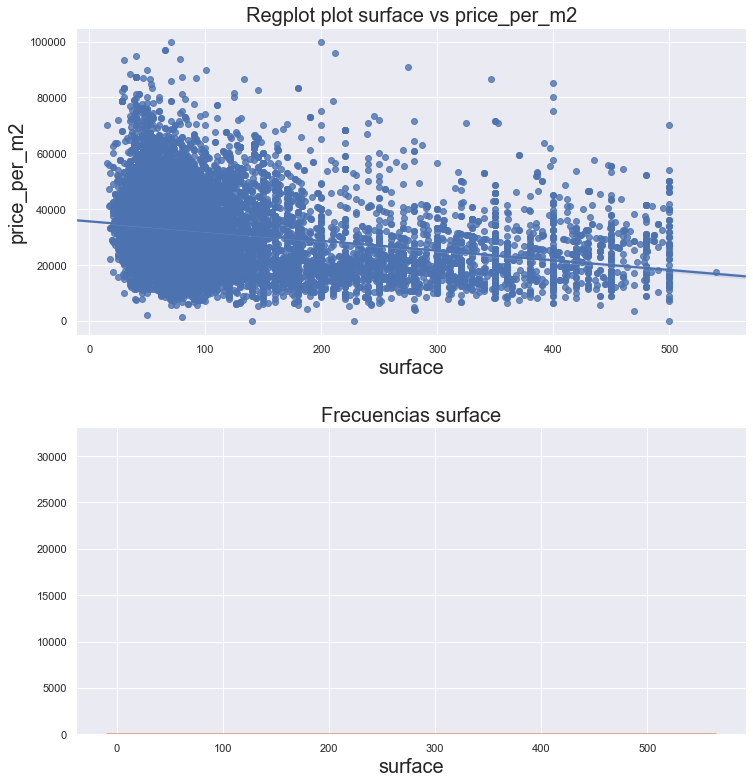

In [94]:
'''
'''
scatter_dists('surface')

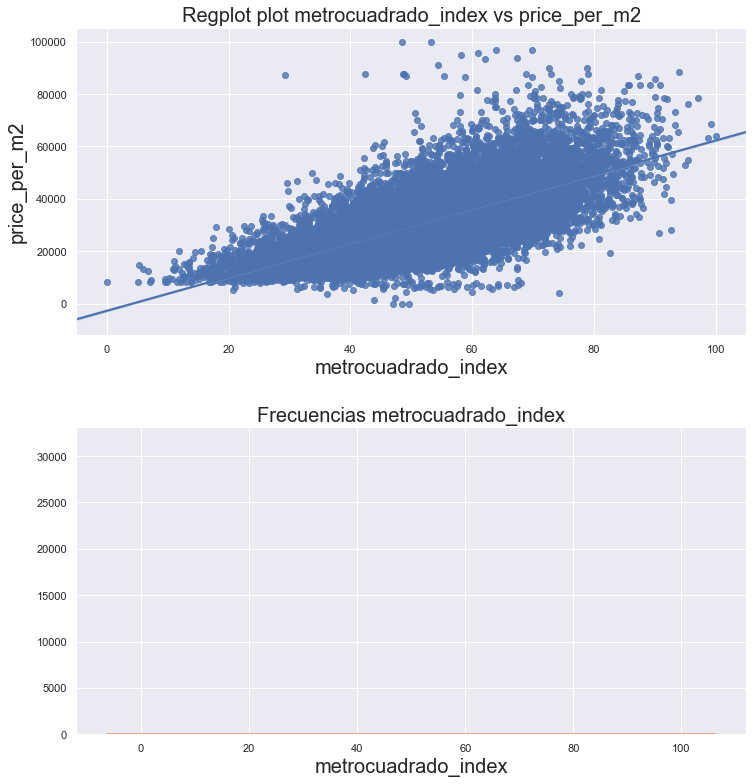

In [95]:
'''Notamos que esta variable, que presenta una buena distribución en
la data presenta un comportamiento lineal con ruido, puede que esta 
variable sea de interés.
'''
scatter_dists('metrocuadrado_index')

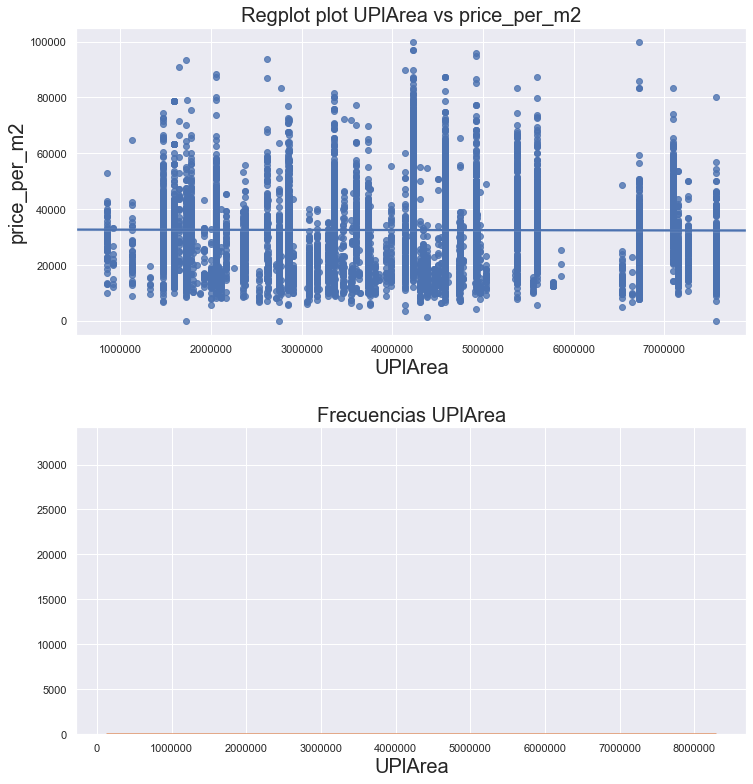

In [96]:
'''Claro ruido, 'price_per_m2' no presenta ninguna respuesta clara ante
esta variable.
Resultado análogo entre
'UPlArea'
'trabajoinf_ninos_5_17_anos_perc'
'trabajoinfampliado_ninos_5_17_anos_perc'
'jovenes_14_24_anos_nini_perc'
'indice_envegecimiento'
'jefe_mujer_perc'
'adultos_mayores_pobres_perc'
'indice_inseguridad'
'areas_verdes_perc'
'densidad_poblacion'
'''
scatter_dists('UPlArea')

In [97]:
'''Veamos ahora si existe dependencia entre variables de interés
'''

'Veamos ahora si existe dependencia entre variables de interés\n'

In [98]:
# Se genera una función auxiliar, de la clase 9 del curso.

def indexer(cols, t_c = df.columns):
    '''Genera columnas multinivel a partir de nombres de columna planos.'''
    
    set_to_tuple = set(*[cols])

    tuples = [
        i for i in t_c if set_to_tuple.intersection(set(i))
    ]
    
    return tuples

In [99]:
interest= ['UPlArea','price','surface','metrocuadrado_index',
           'personas', 'trabajoinf_ninos_5_17_anos_perc',
           'trabajoinfampliado_ninos_5_17_anos_perc',
           'jovenes_14_24_anos_nini_perc','indice_envegecimiento',
           'jefe_mujer_perc','adultos_mayores_pobres_perc','indice_inseguridad',
           'areas_verdes_perc','densidad_poblacion','price_per_m2',
           'n_rooms','n_garajes','n_bath']
           #,'property_type','furnished','product_type','rent_type']
idxs = indexer(interest)

In [100]:
interest = ['price','surface','metrocuadrado_index','personas',
            'indice_inseguridad','price_per_m2',
            'n_rooms','n_garajes','n_bath']
idxs = indexer(interest)
idxs.sort()
idxs.remove(('numeric', 'price_per_m2'))
idxs.append(('numeric', 'price_per_m2'))
idxs

[('categorical', 'n_bath'),
 ('categorical', 'n_garajes'),
 ('categorical', 'n_rooms'),
 ('numeric', 'indice_inseguridad'),
 ('numeric', 'metrocuadrado_index'),
 ('numeric', 'personas'),
 ('numeric', 'price'),
 ('numeric', 'surface'),
 ('numeric', 'price_per_m2')]

C:\Users\kurtw\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kurtw\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kurtw\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kurtw\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


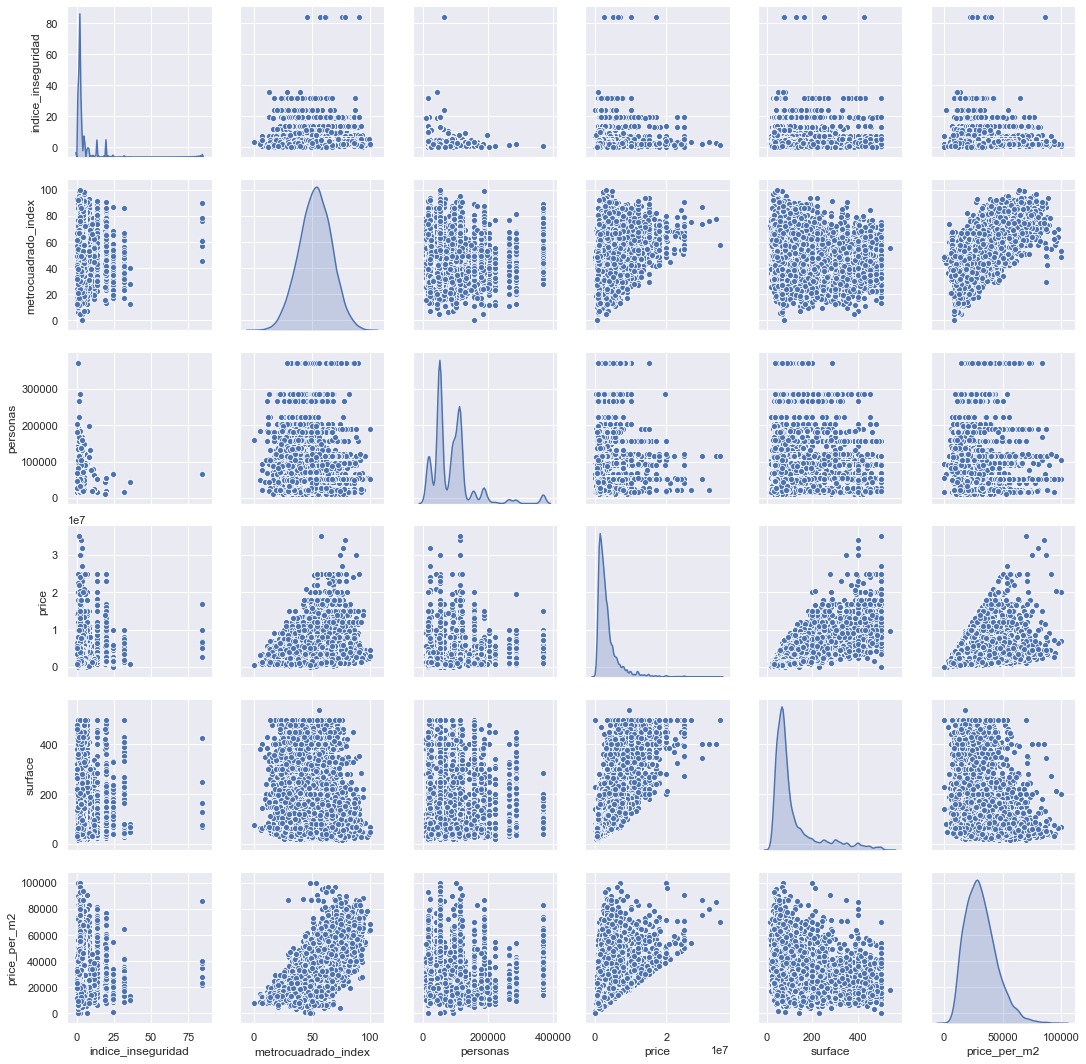

In [101]:
data = df.reindex(idxs, axis=1).droplevel(0,axis=1)
sns.pairplot(data=data, diag_kind='kde')

In [102]:
corrmatrix = df.corr()
corrmatrix

numeric            \
                                                      UPlArea     price   
numeric     UPlArea                                  1.000000  0.027747   
            price                                    0.027747  1.000000   
            surface                                  0.023095  0.772977   
            metrocuadrado_index                     -0.010659  0.169523   
            personas                                 0.602691  0.029735   
            trabajoinf_ninos_5_17_anos_perc         -0.115445 -0.023598   
            trabajoinfampliado_ninos_5_17_anos_perc -0.413799 -0.073641   
            jovenes_14_24_anos_nini_perc            -0.059356 -0.023463   
            indice_envegecimiento                   -0.106352  0.067842   
            jefe_mujer_perc                         -0.488944  0.072255   
            adultos_mayores_pobres_perc             -0.046152 -0.009203   
            indice_inseguridad                      -0.248719  0.003351   
            areas_verdes_perc                        0.200544  0.047721   
            densidad_poblacion                       0.019044  0.006298   
            price_per_m2                            -0.005115  0.266105   
categorical furnished                               -0.014925  0.016633   

                                                               \
                                                      surface   
numeric     UPlArea                                  0.023095   
            price                                    0.772977   
            surface                                  1.000000   
            metrocuadrado_index                     -0.207679   
            personas                                 0.062626   
            trabajoinf_ninos_5_17_anos_perc          0.033834   
            trabajoinfampliado_ninos_5_17_anos_perc -0.062283   
            jovenes_14_24_anos_nini_perc             0.059924   
            indice_envegecimiento                   -0.071768   
            jefe_mujer_perc                         -0.094548   
            adultos_mayores_pobres_perc              0.034634   
            indice_inseguridad                      -0.011134   
            areas_verdes_perc                        0.090240   
            densidad_poblacion                       0.074684   
            price_per_m2                            -0.262104   
categorical furnished                               -0.117715   

                                                                         \
                                                    metrocuadrado_index   
numeric     UPlArea                                           -0.010659   
            price                                              0.169523   
            surface                                           -0.207679   
            metrocuadrado_index                                1.000000   
            personas                                          -0.050472   
            trabajoinf_ninos_5_17_anos_perc                   -0.065176   
            trabajoinfampliado_ninos_5_17_anos_perc            0.016232   
            jovenes_14_24_anos_nini_perc                      -0.113050   
            indice_envegecimiento                              0.196432   
            jefe_mujer_perc                                    0.250163   
            adultos_mayores_pobres_perc                       -0.055714   
            indice_inseguridad                                 0.014241   
            areas_verdes_perc                                 -0.077756   
            densidad_poblacion                                -0.089901   
            price_per_m2                                       0.682398   
categorical furnished                                          0.232640   

                                                               \
                                                     personas   
numeric     UPlArea                                

In [103]:
col= indexer(['price_per_m2'])
corrmatrix[col].nlargest(10,col)

numeric
                                                    price_per_m2
numeric     price_per_m2                                1.000000
            metrocuadrado_index                         0.682398
categorical furnished                                   0.349109
numeric     jefe_mujer_perc                             0.330641
            price                                       0.266105
            indice_envegecimiento                       0.254868
            trabajoinfampliado_ninos_5_17_anos_perc     0.017619
            indice_inseguridad                          0.015364
            UPlArea                                    -0.005115
            adultos_mayores_pobres_perc                -0.060912

# Parte 3

In [104]:
'''En nuestro caso solo tenemos que las variables missing corresponden
a datos que no lograron ser incluidos debido a la falta de la variable
'upz' para algunos barrios.
'''
df.isnull().sum()

numeric       UPlArea                                    1937
              price                                         0
              surface                                       0
              metrocuadrado_index                           0
              personas                                   1937
              trabajoinf_ninos_5_17_anos_perc            1937
              trabajoinfampliado_ninos_5_17_anos_perc    1937
              jovenes_14_24_anos_nini_perc               1937
              indice_envegecimiento                      1937
              jefe_mujer_perc                            1937
              adultos_mayores_pobres_perc                1937
              indice_inseguridad                         1937
              areas_verdes_perc                          1937
              densidad_poblacion                         1937
              price_per_m2                                  0
categorical   product_type                                  0
        

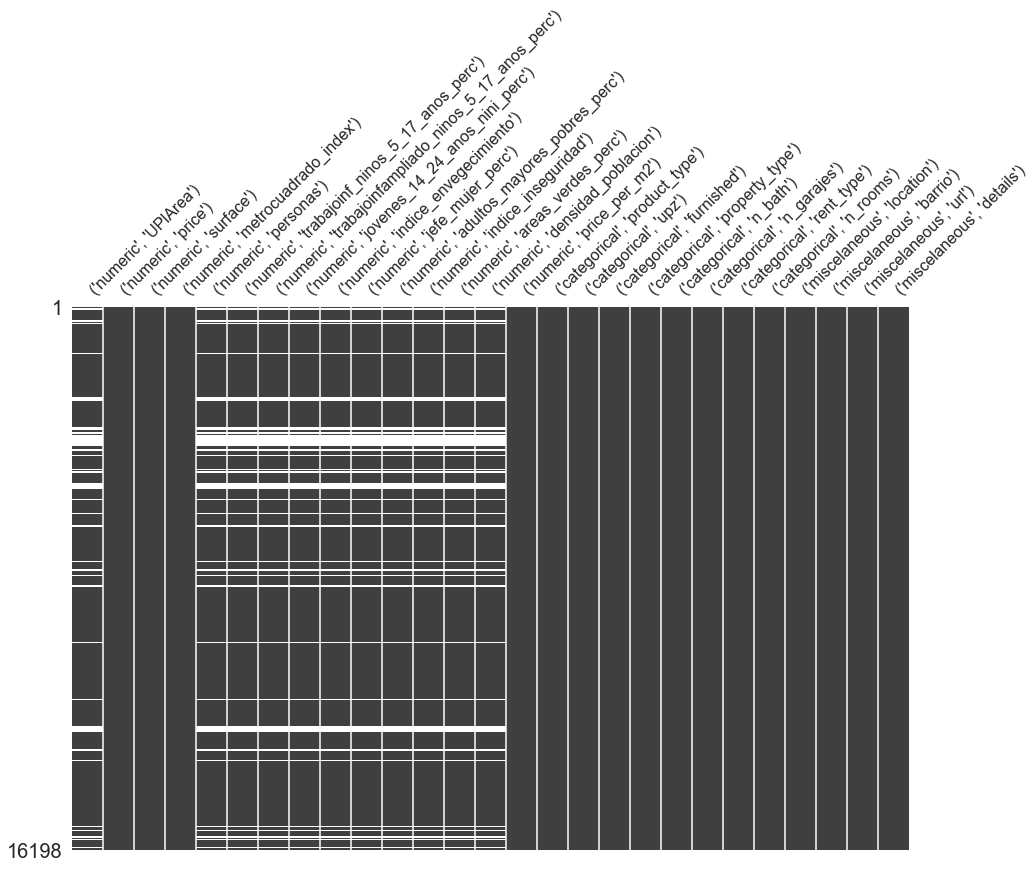

In [105]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df,ax = ax, sparkline=False)

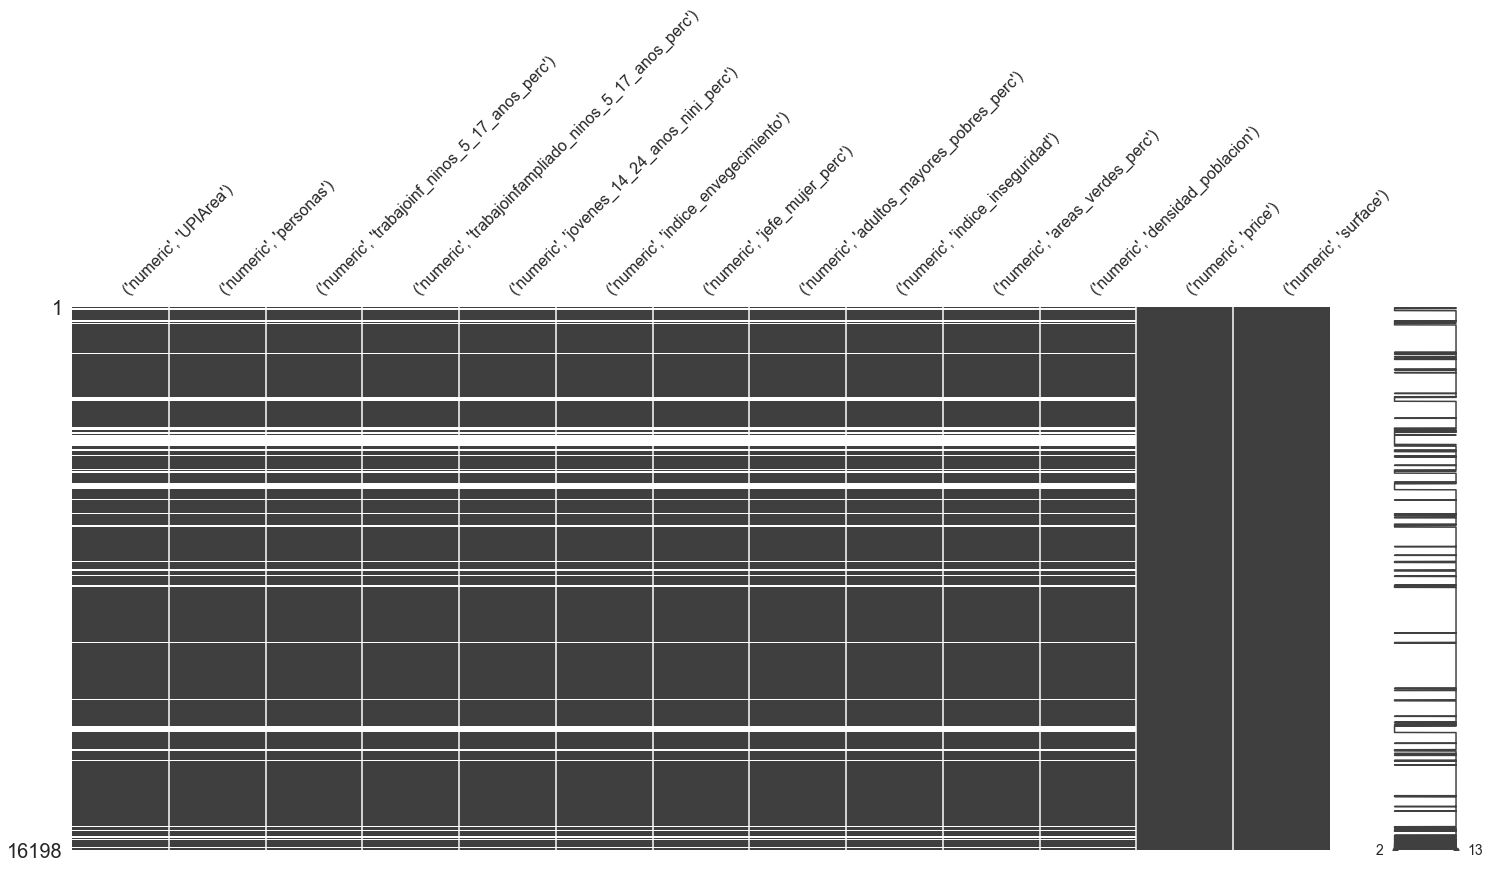

In [106]:
msno.matrix(df[list(df.isnull().sum().nlargest(13).index)], sparkline=True)

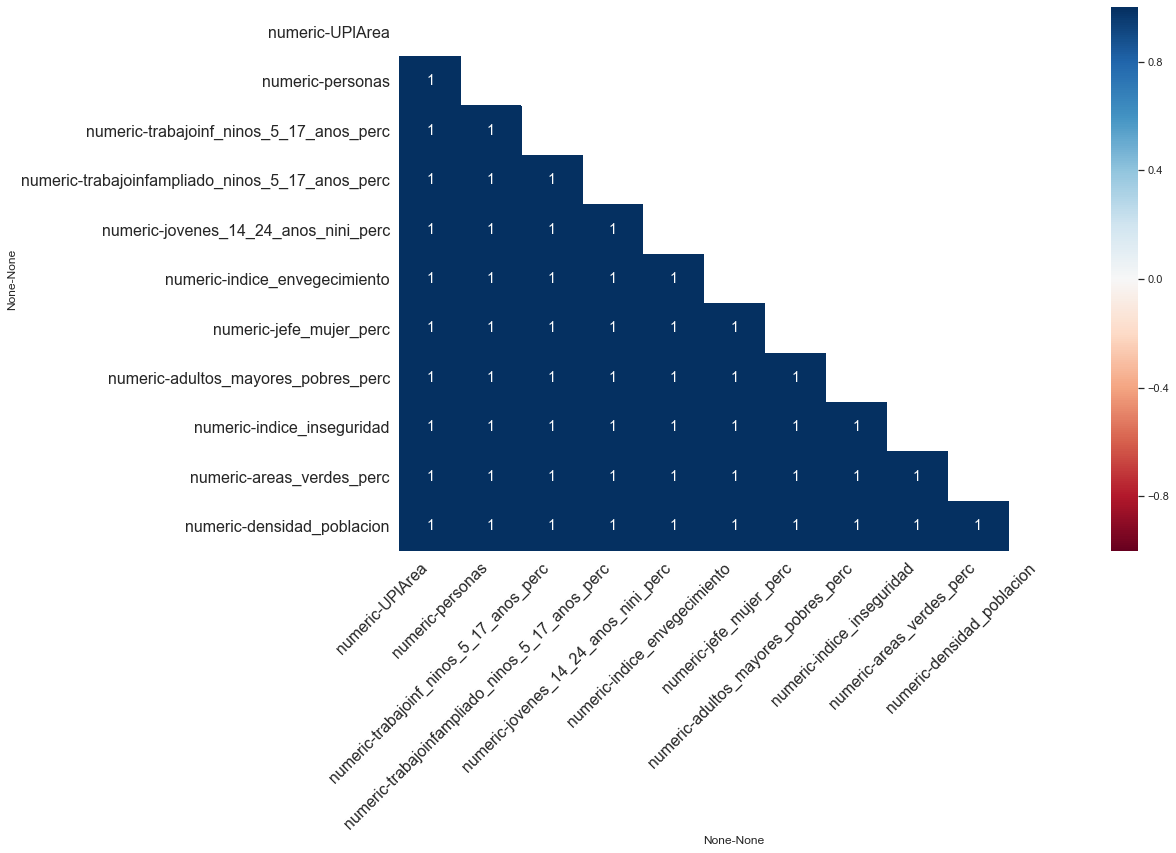

In [107]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.heatmap(df, ax = ax)

# Parte 4

In [108]:
'''Recordemos como distribuye la variable categorica 'upz'
'''
upzs = df[('categorical','upz')]
upzs.value_counts()

UPZ97     3100
nan       1937
UPZ16     1450
UPZ13     1053
UPZ14      736
          ... 
UPZ80        1
UPZ105       1
UPZ116       1
UPZ23        1
UPZ110       1
Name: (categorical, upz), Length: 101, dtype: int64

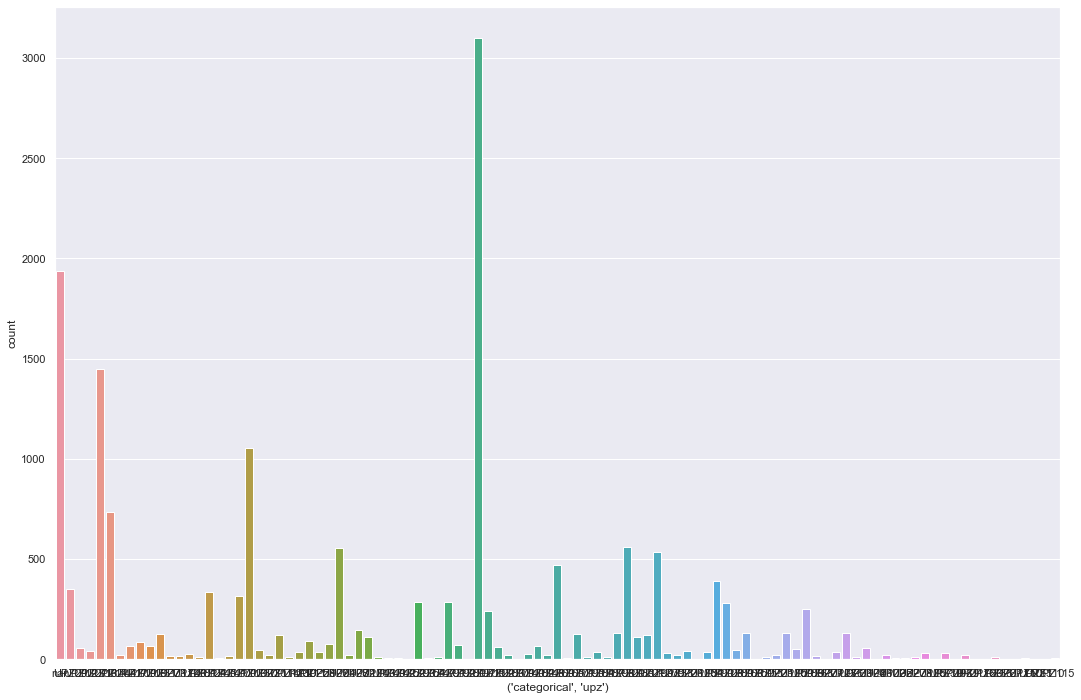

In [109]:
sns.countplot(upzs)

In [110]:
from sklearn.cluster import KMeans